# Check delta fields files for DR16S82

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from matplotlib.transforms import Affine2D
from scipy.integrate import quad as quad

#import voidfinder
#from voidfinder import distance
#from voidfinder.distance import z_to_comoving_dist
from astropy import constants as const
from astropy.table import Table

from os import listdir
from os.path import isfile, join

import os
from astropy.io import fits
in_directory='/global/homes/i/ineslie/myhack_DR16/Delta_LYA/Delta/M'
os.chdir(in_directory)

In [2]:
delta_filename='deltafields_RAadded90.fits'

In [3]:
deltaf = fits.open(delta_filename)  
deltaf =Table(deltaf[1].data)
deltaf[0:5]

ra,dec,z,delta
float64,float64,float64,float64
111.65201097115994,-1.0040558414971168,1.9695286235943632,-0.7501514290604856
111.65201097115994,-1.0040558414971168,1.9715806099463196,-2.9951701434370044
111.65201097115994,-1.0040558414971168,1.9736340142499142,-8.42713942396928
111.65201097115994,-1.0040558414971168,1.975688837484979,1.443690511787549
111.65201097115994,-1.0040558414971168,1.9777450806320127,-4.4328915242131295


In [4]:
min(deltaf['z'])

1.9613348381301479

In [5]:
max(deltaf['z'])

3.1456011473906003

In [4]:
less_1=deltaf[deltaf['delta']<-1]

In [5]:
len(less_1)

91748

In [6]:
less_1

ra,dec,z,delta
float64,float64,float64,float64
111.65201097115994,-1.0040558414971168,1.9715806099463196,-2.9951701434370044
111.65201097115994,-1.0040558414971168,1.9736340142499142,-8.42713942396928
111.65201097115994,-1.0040558414971168,1.9777450806320127,-4.4328915242131295
111.65201097115994,-1.0040558414971168,1.9839223393601022,-3.3280128864671483
111.65201097115994,-1.0040558414971168,1.9880476294117169,-3.229661362697265
111.65201097115994,-1.0040558414971168,1.9963153271124354,-1.3759831523254058
111.65201097115994,-1.0040558414971168,2.002531109358842,-5.339736738300107
111.65201097115994,-1.0040558414971168,2.006682126143603,-1.6263272705084464
111.65201097115994,-1.0040558414971168,2.008759786092218,-2.70264363295152


In [7]:
len(deltaf)

1271156

In [8]:
len(less_1)/len(deltaf)

0.07217682172762431

In [9]:
min(deltaf['delta'])

-739.13837087441

In [10]:
max(deltaf['delta'])

56261.50667833517

In [11]:
np.mean(deltaf['delta'])

0.08514045569228915

In [12]:
a=deltaf[deltaf['delta']>-1]
a=a[a['delta']<1]

In [13]:
len(a)

1080339

In [16]:
np.percentile(a['delta'], 90)

0.521304226790386

In [17]:
b=a[a['delta']<0.52]

In [18]:
len(b)/len(a)

0.8994945105193832

In [14]:
len(a)/len(deltaf)

0.8498870319614586

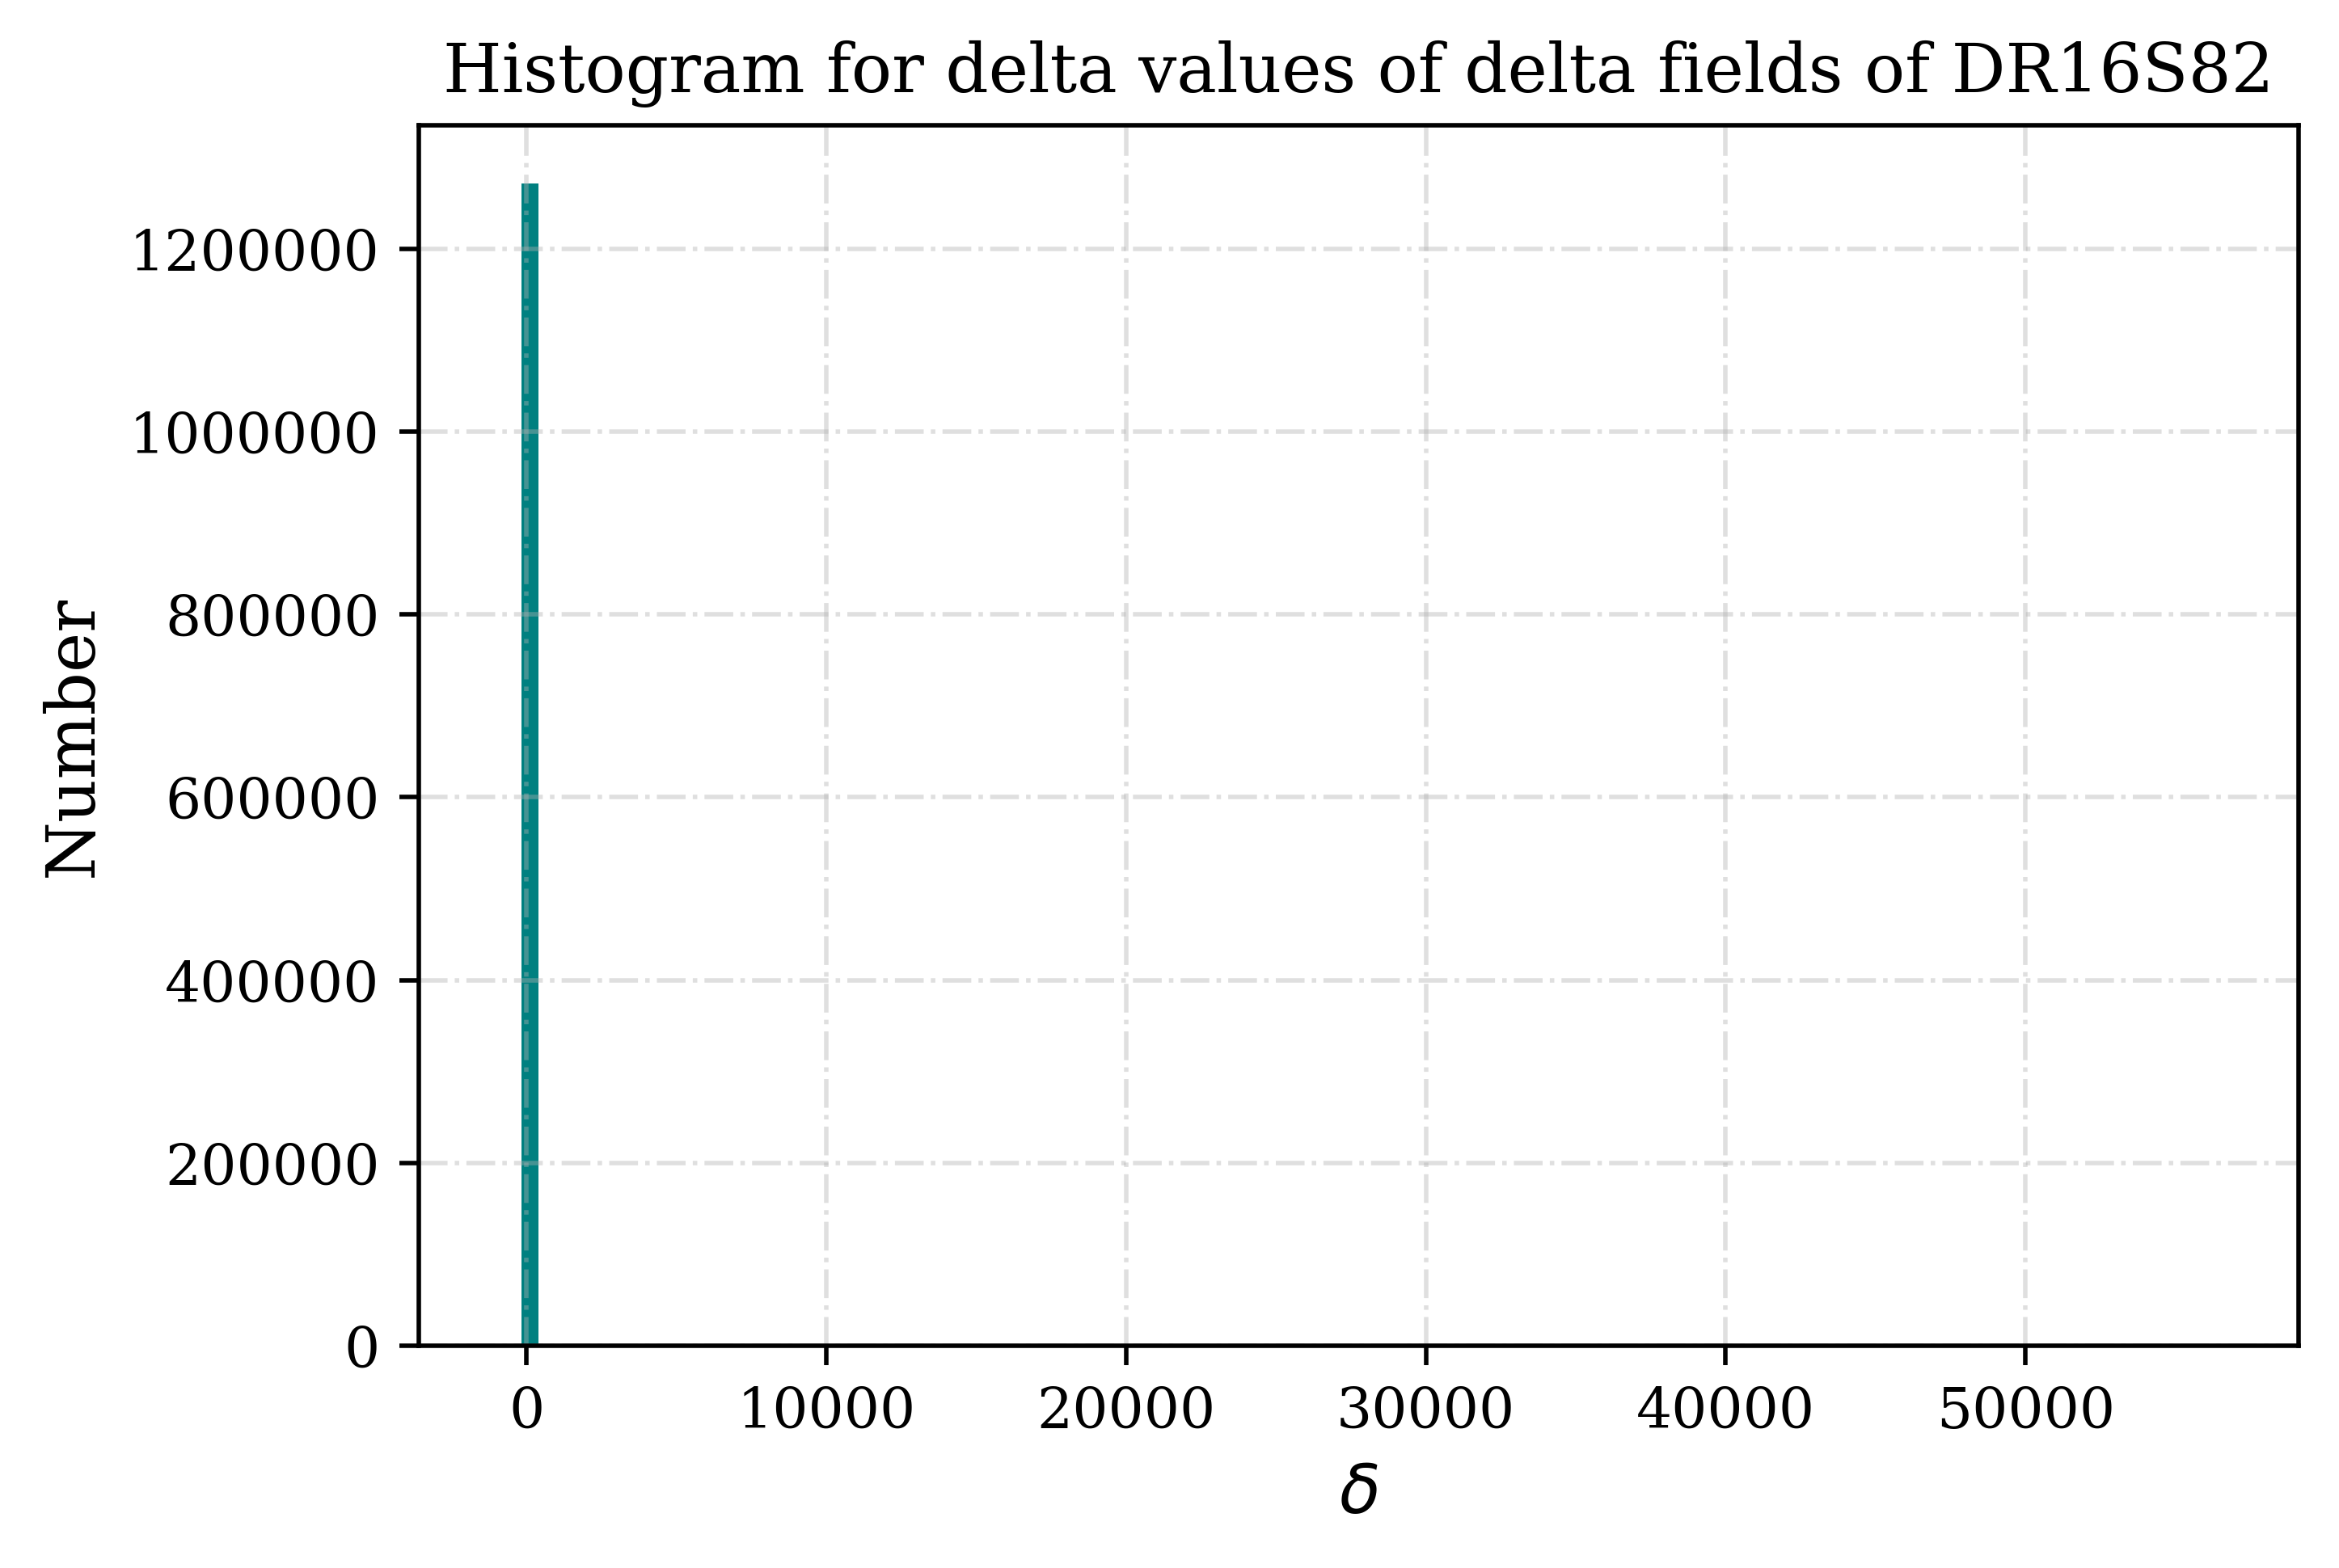

In [12]:
#Histogram of delta values
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for delta values of delta fields of DR16S82',fontsize=12)                                         
plt.xlabel(r'$\delta$',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(deltaf['delta'] , color='teal',bins=100)                                                                   \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')  
#max(quasars['comoving'])

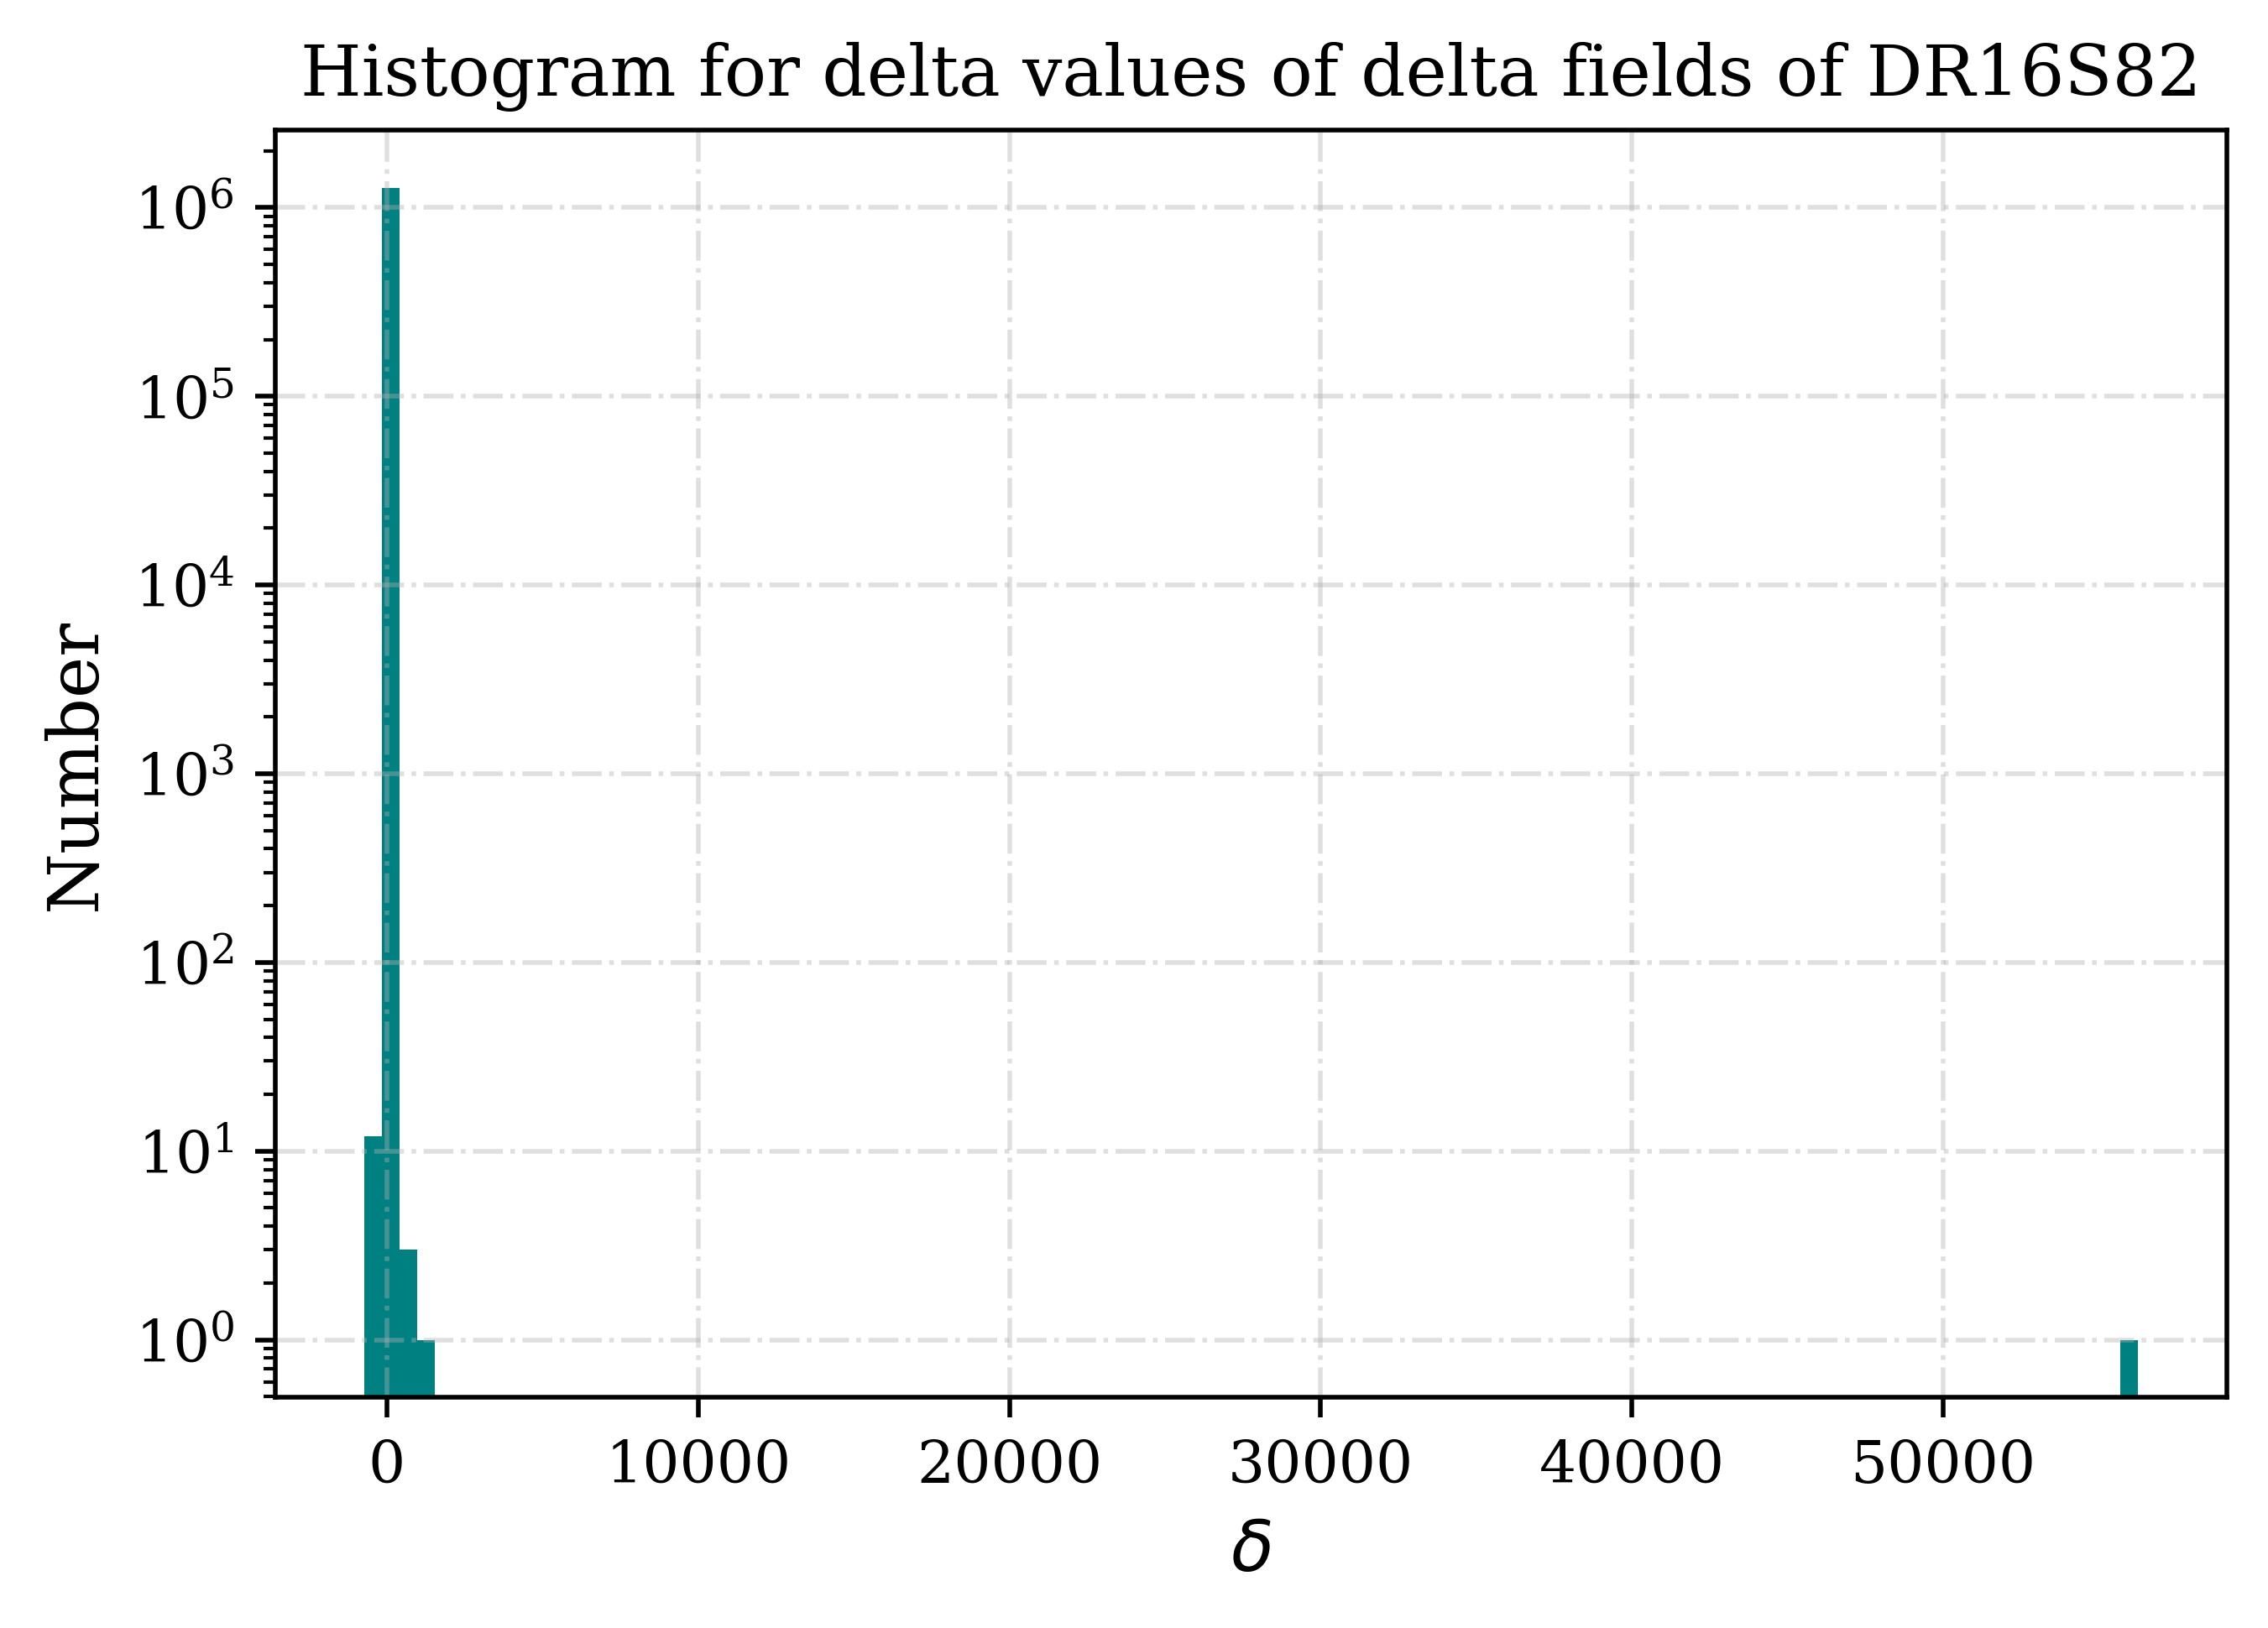

In [13]:
#Histogram of delta values
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for delta values of delta fields of DR16S82',fontsize=12)                                         
plt.xlabel(r'$\delta$',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(deltaf['delta'] , log=True, color='teal',bins=100)          #bin                                                         \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')  
#max(quasars['comoving'])

In [14]:
#Where does this value happen?
deltaf_50000=deltaf[deltaf['delta']>50000]
deltaf_50000['ra']

76.55375649391635


In [15]:
def check_fits(namelist=('delta-89.fits.gz')):
    
    for filename in namelist:
        data = fits.open(filename)

        for hdu_num in range(1,len(data)):
            if data[hdu_num].header['RA']*(180/np.pi)== deltaf_50000['ra']-90+360 and data[hdu_num].header['DEC']*(180/np.pi)== deltaf_50000['dec'] :
                print(hdu_num)
                print(filename)
                #report_1=hdu_num
                #report_2=filename

    return 

In [16]:
def check_delta(namelist=('delta-89.fits.gz')):                                                                                                                                        

    for filename in namelist:
        data = fits.open(filename)

        for hdu_num in range(1,len(data)):
            if data[hdu_num].data['DELTA'].any == 56261.50667833517 :
                print(hdu_num)
                print(filename)
                                                                                                                                                    
    return 

In [17]:
onlyfiles = [f for f in listdir(in_directory) if isfile(join(in_directory, f))]
onlyfiles.remove('deltafields_RAadded90.fits')
onlyfiles.remove('quasars.fits')

In [18]:
check_fits(onlyfiles)

799
delta-103.fits.gz


In [19]:
#check_delta(onlyfiles)

In [20]:
outlier = fits.open('delta-103.fits.gz')

In [21]:
outlier[799].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                  202 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'LOGLAM  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'log Angstrom'       / physical unit of field                         
TTYPE2  = 'DELTA   '           / label for field   2                            
TFORM2  = 'D       '        

In [22]:
Table(outlier[799].data)

LOGLAM,DELTA,WEIGHT,CONT
float64,float64,float64,float64
3.557502500767287,56261.50667833517,6.34974391239827e-10,3.219530212934523e-05
3.5578025007672873,-96.72804898633898,6.238965189630048e-07,0.0009587414235163891
3.558102500767287,-68.8306540710277,2.3282417387342814e-06,0.0018561380400876314
3.5584025007672873,107.25403549589205,4.881637734229205e-06,0.002738410327445908
3.5587025007672874,598.8367602721225,7.4458752108257985e-06,0.0035312635024324643
3.559002500767287,-127.98052562198757,1.2635478066360889e-05,0.004338605525184268
3.5593025007672874,-154.4401571881119,2.0291280996628316e-05,0.005163142170120355
3.559602500767287,59.23140125186057,2.4399317383980193e-05,0.005916588439205306
3.5599025007672873,-174.38597686289083,3.0476061764827967e-05,0.00659443244332596


In [23]:
deltaf_10000=deltaf[deltaf['delta']<10000]

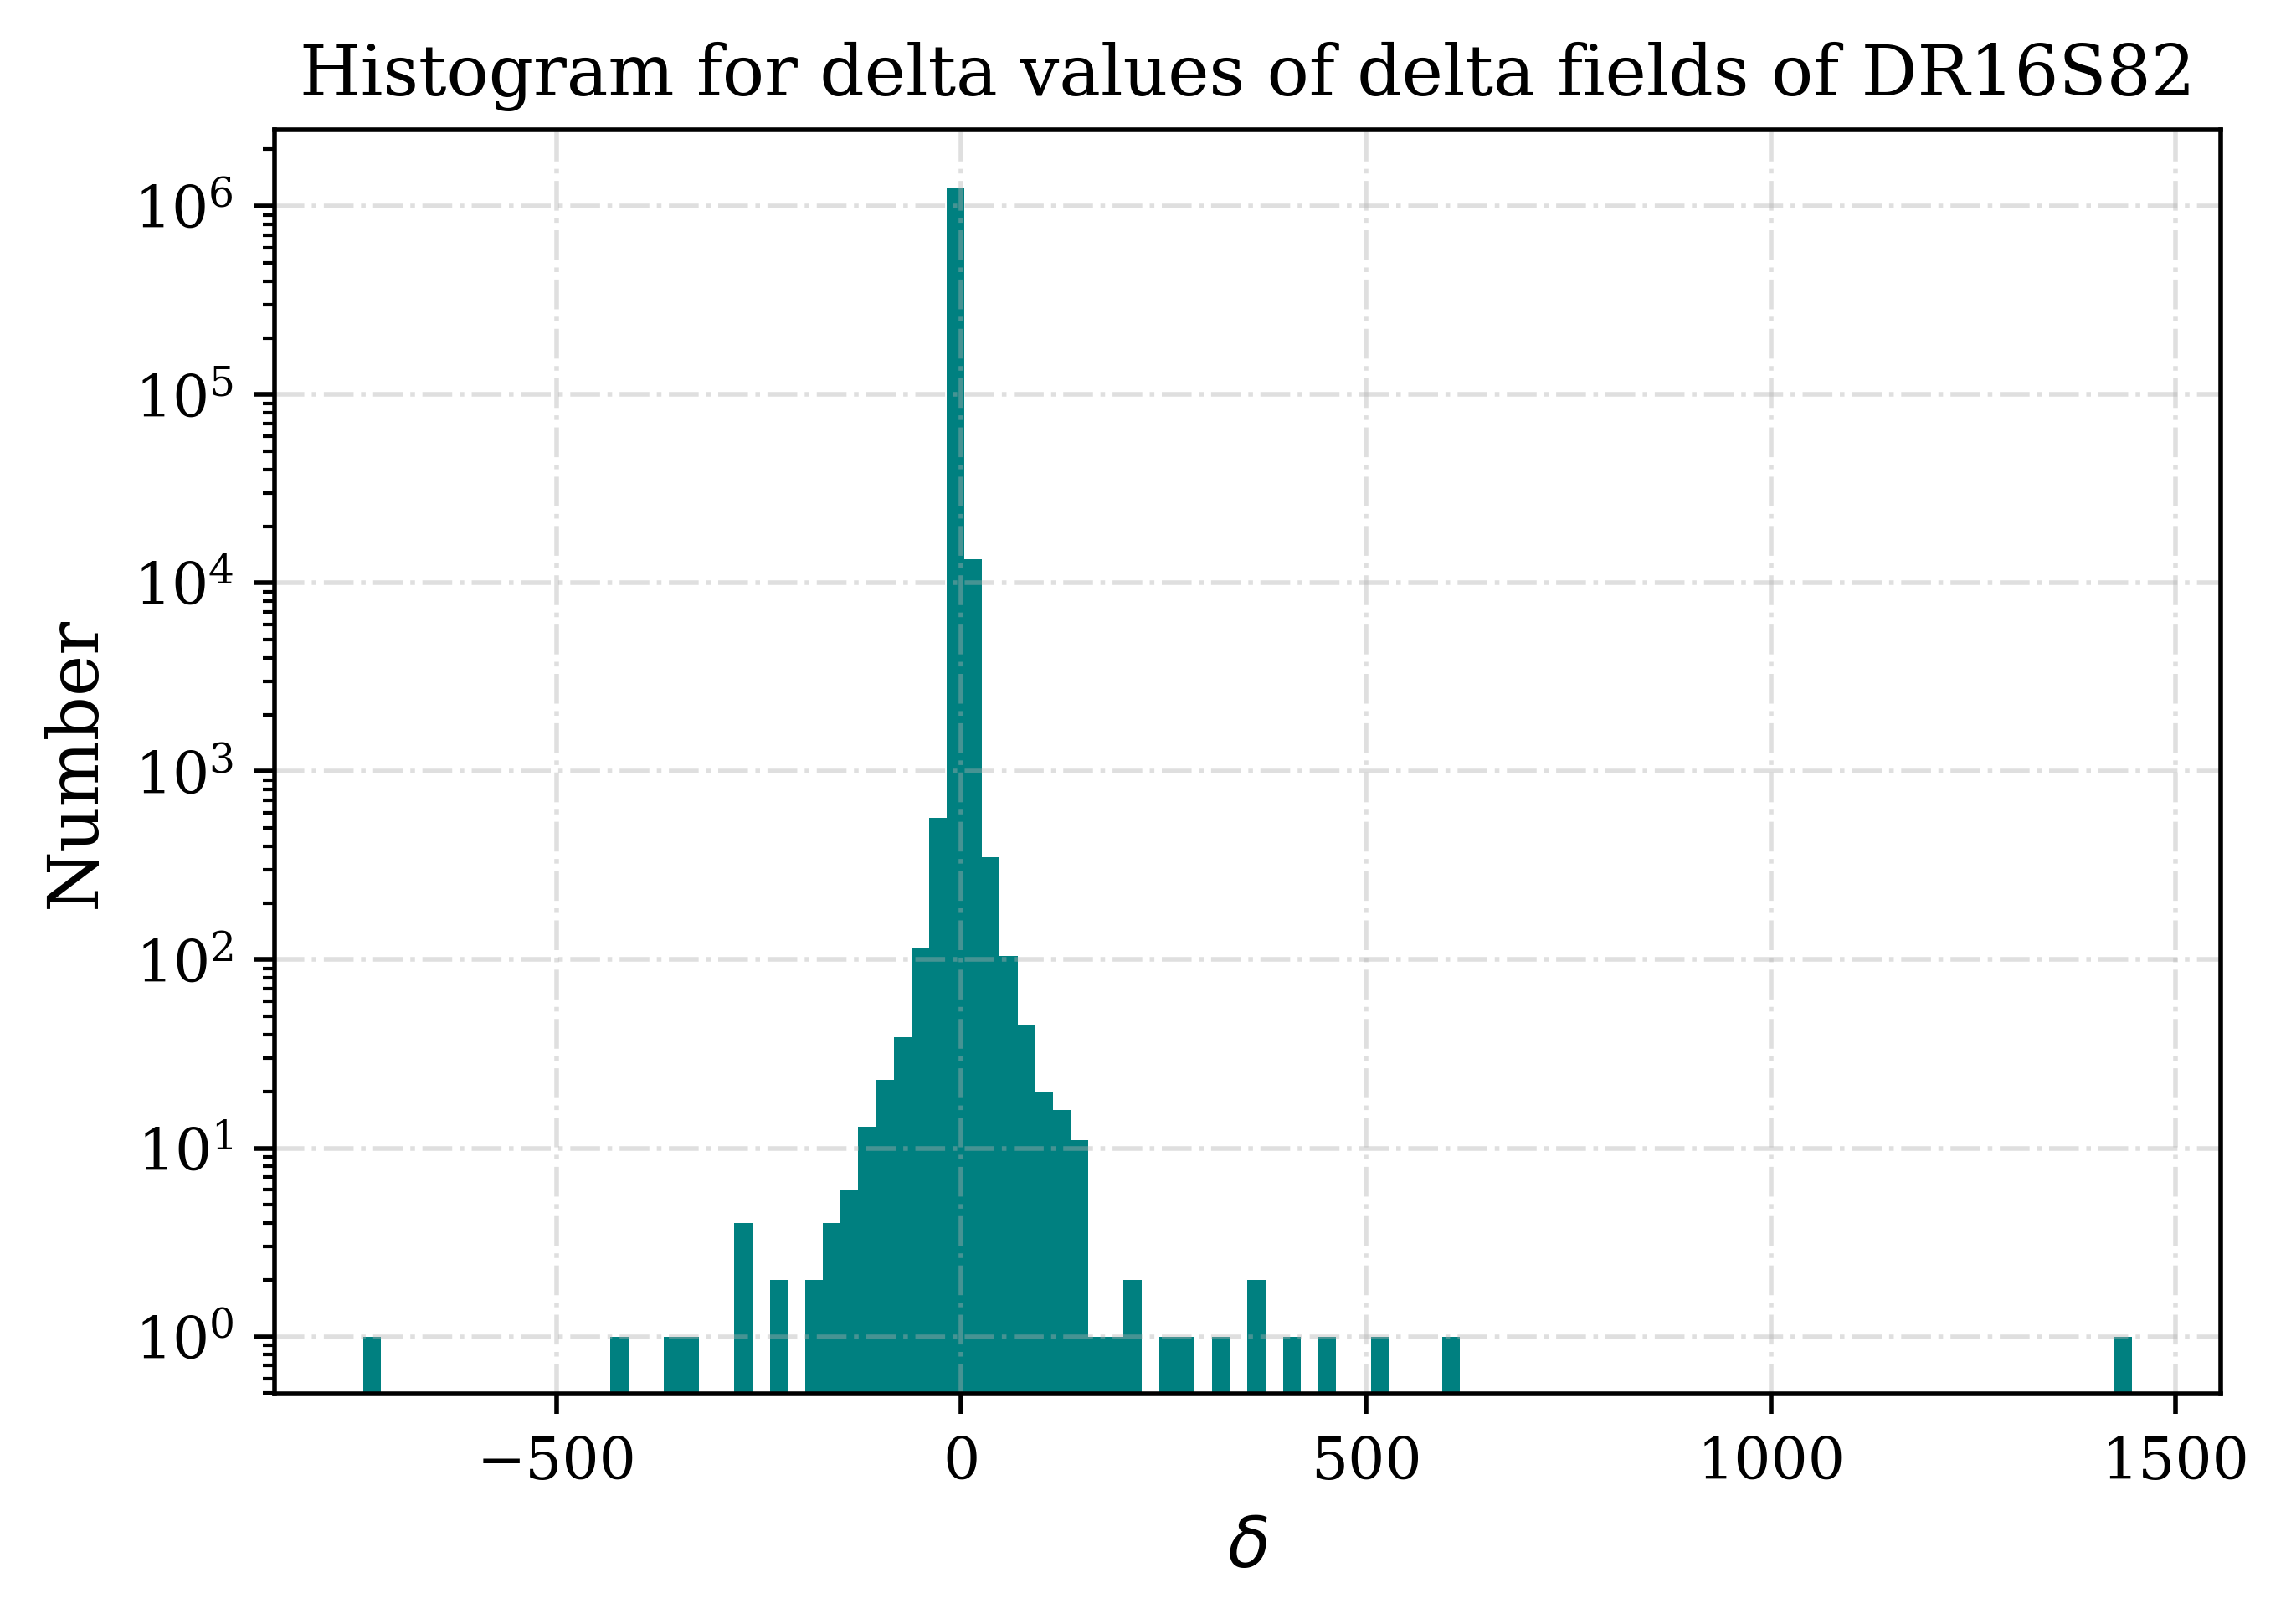

In [24]:
#Histogram of delta values
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for delta values of delta fields of DR16S82',fontsize=12)                                         
plt.xlabel(r'$\delta$',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(deltaf_10000['delta'] , log=True, color='teal',bins=100)          #bin                                                         \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')  
#max(quasars['comoving'])

In [25]:
large=deltaf[deltaf['delta']>40000]
large

ra,dec,z,delta
float64,float64,float64,float64
76.55375649391635,-0.8641003469660176,1.9695286235943632,56261.50667833517


In [26]:
### SHOULD TRACE BACK TO ITS SPECTRA BUT THAT WILL NOT BE EASY

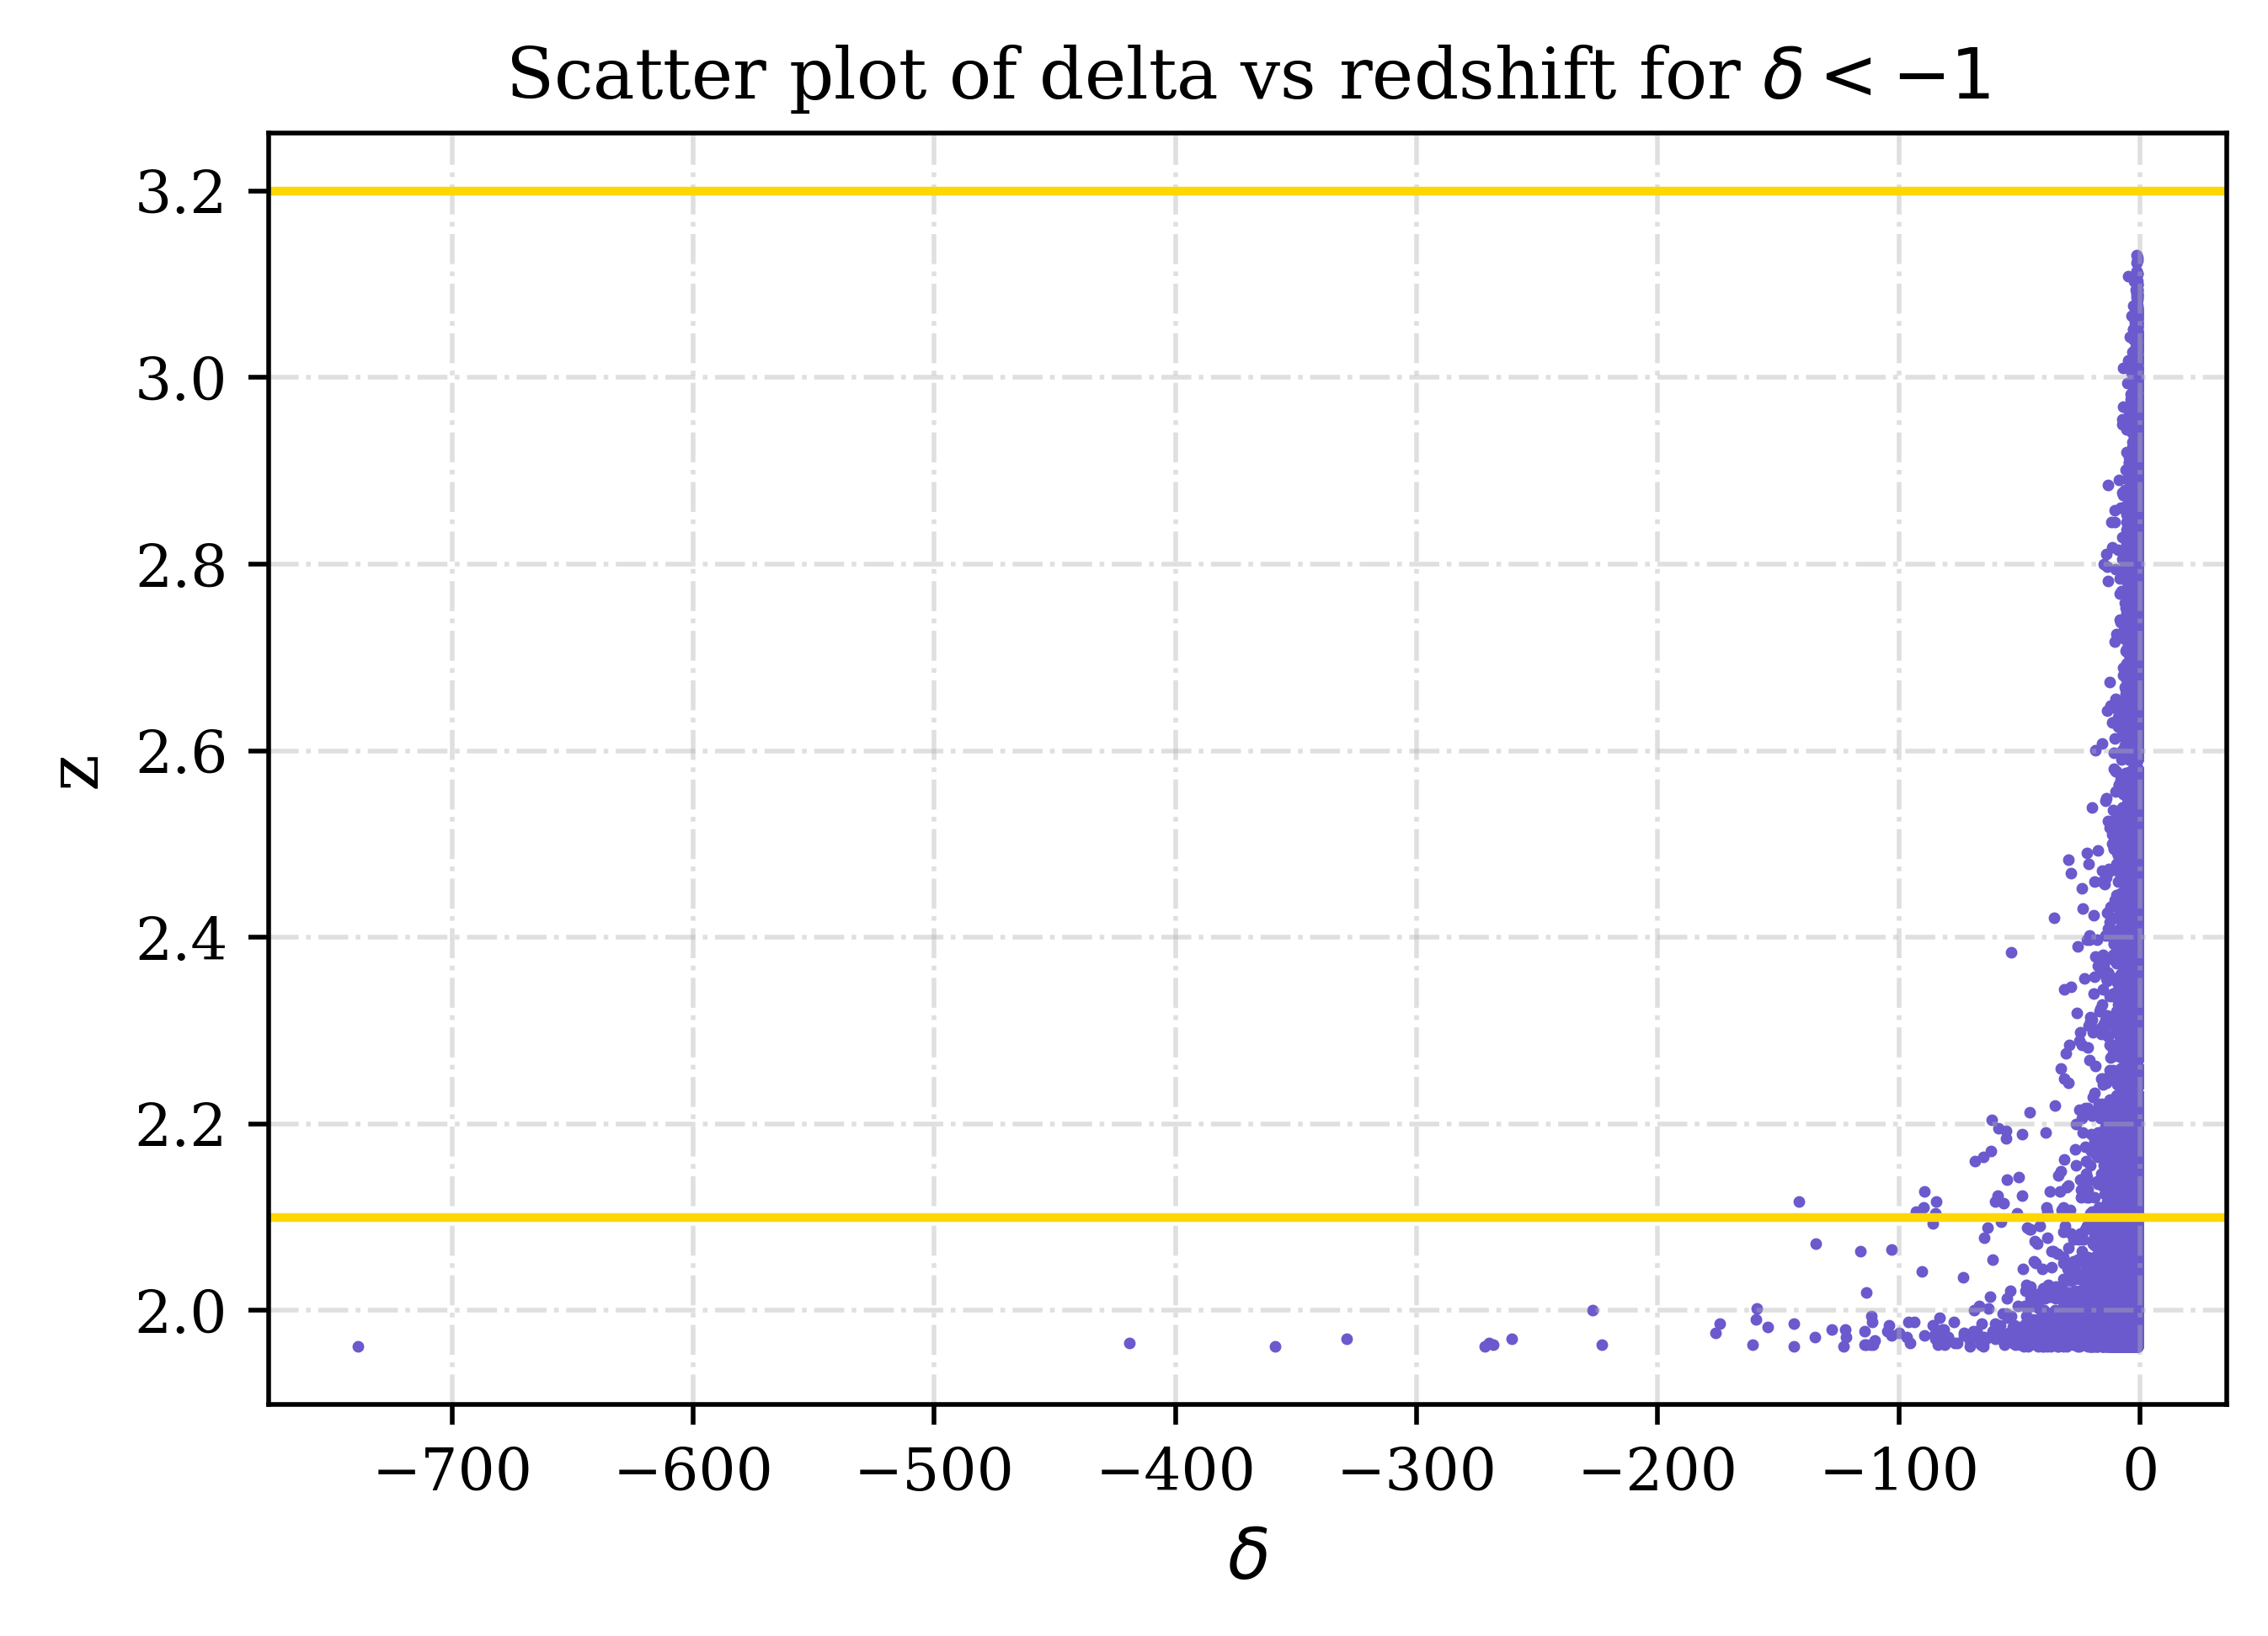

In [27]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\delta$',fontsize=12)                                                                       
plt.ylabel(r'z',fontsize=12)    
plt.axhline(y=2.1, color='gold', linestyle='-')
plt.axhline(y=3.2, color='gold', linestyle='-')
#plt.axvline(x=-1, color='r', linestyle='-')
plt.scatter(less_1['delta'], less_1['z'],s=1, color='slateblue')
plt.show()

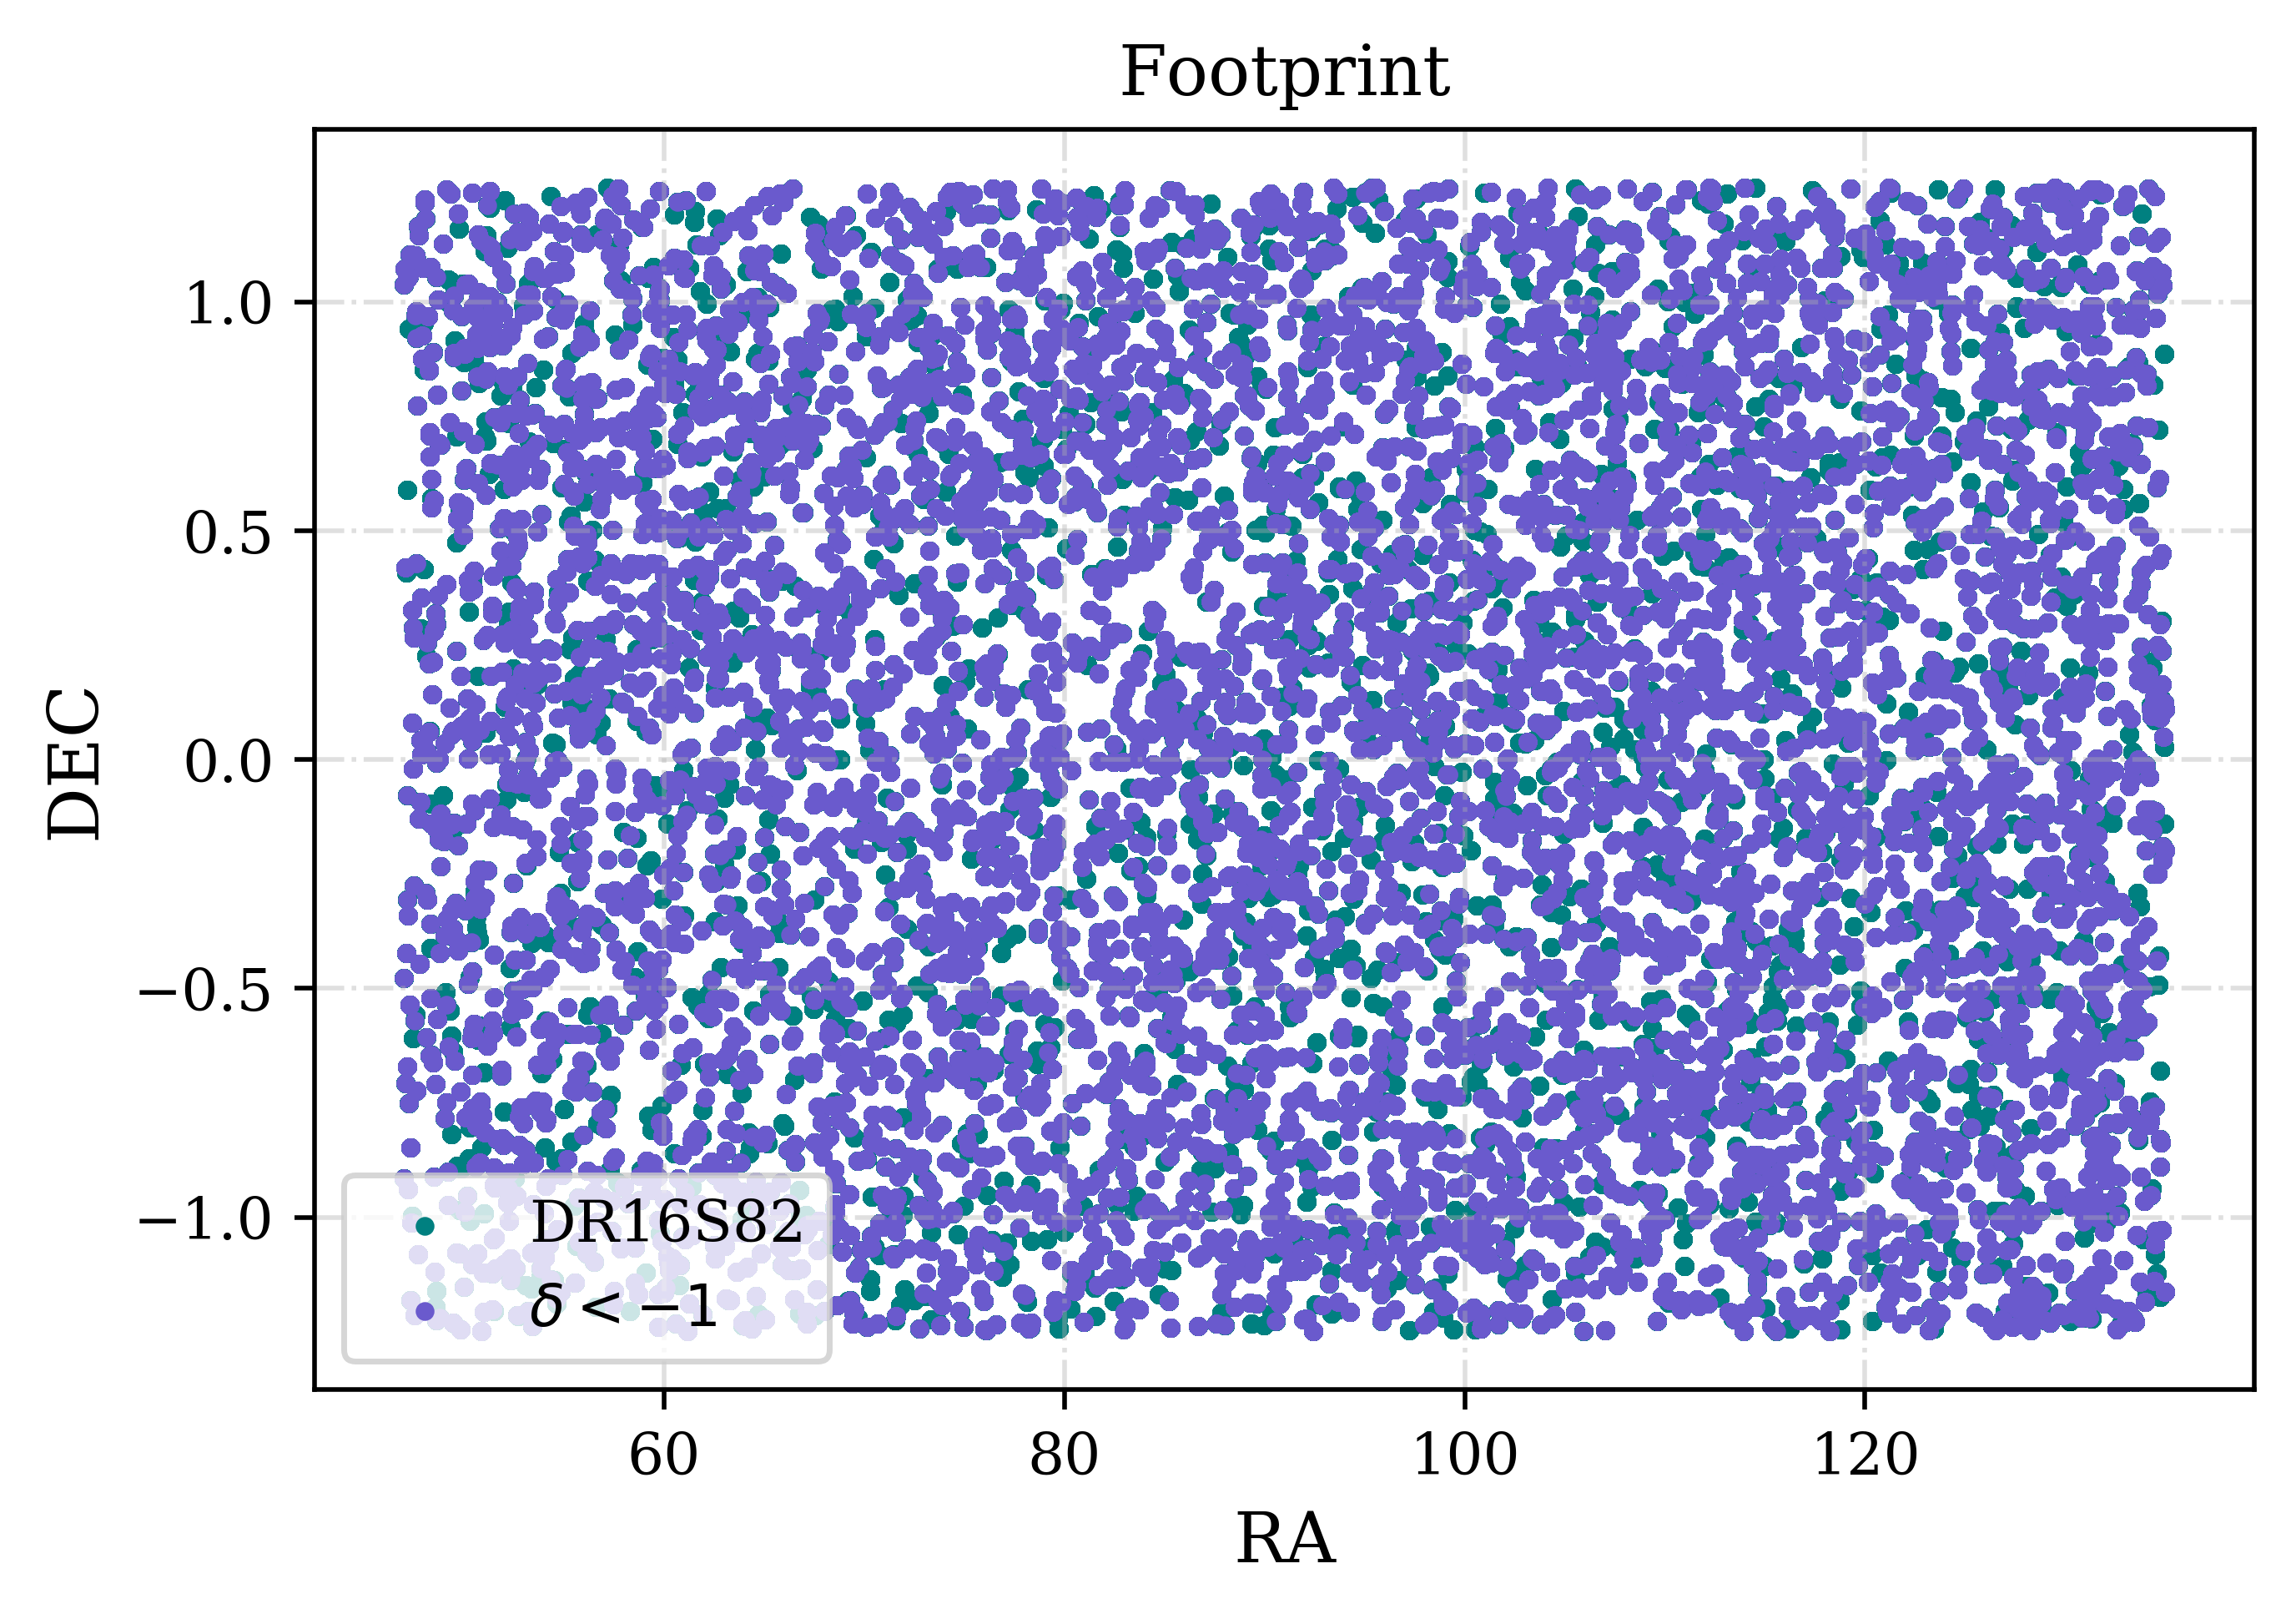

In [28]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Footprint',fontsize=12)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(deltaf['ra'],deltaf['dec'], color='teal', s=5, label='DR16S82')
plt.scatter(less_1['ra'],less_1['dec'], color='slateblue', s=5, label='$\delta<-1$')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

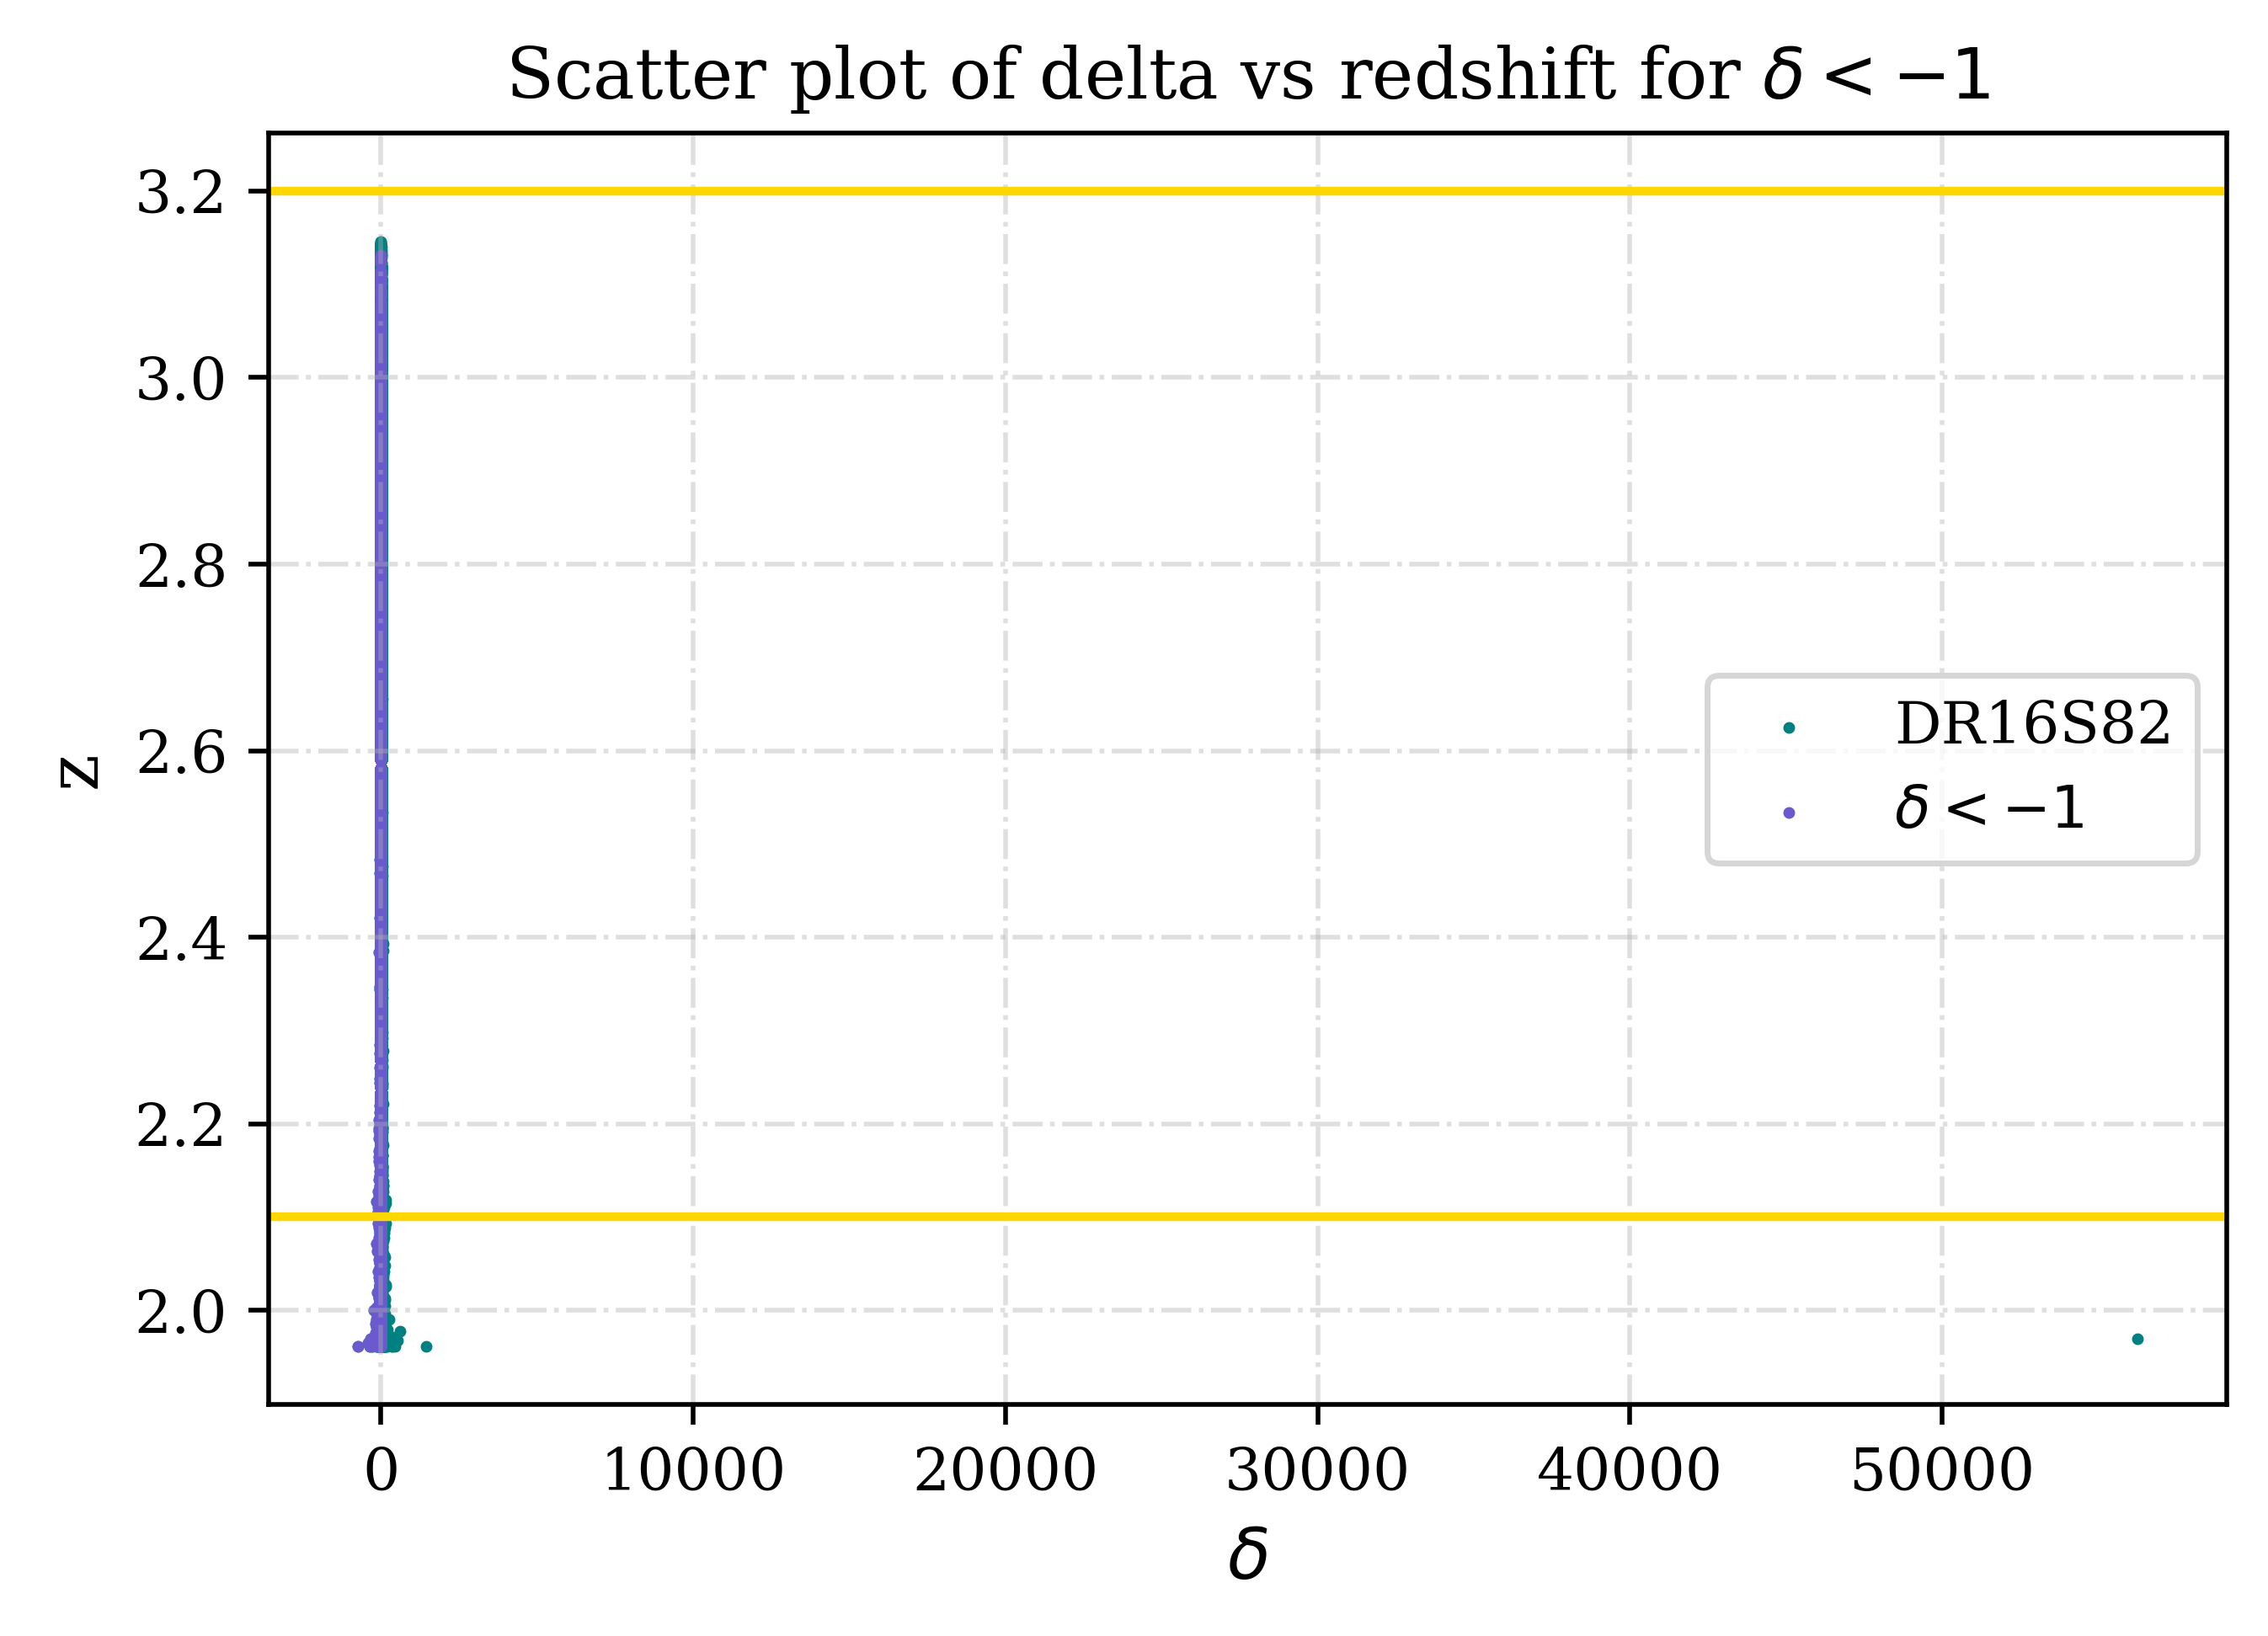

In [29]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\delta$',fontsize=12)                                                                       
plt.ylabel(r'z',fontsize=12)    
plt.axhline(y=2.1, color='gold', linestyle='-')
plt.axhline(y=3.2, color='gold', linestyle='-')
#plt.axvline(x=-1, color='r', linestyle='-')
plt.scatter(deltaf['delta'], deltaf['z'],s=1, color='teal', label='DR16S82')
plt.scatter(less_1['delta'], less_1['z'],s=1, color='slateblue', label='$\delta<-1$')
plt.legend();
plt.show()

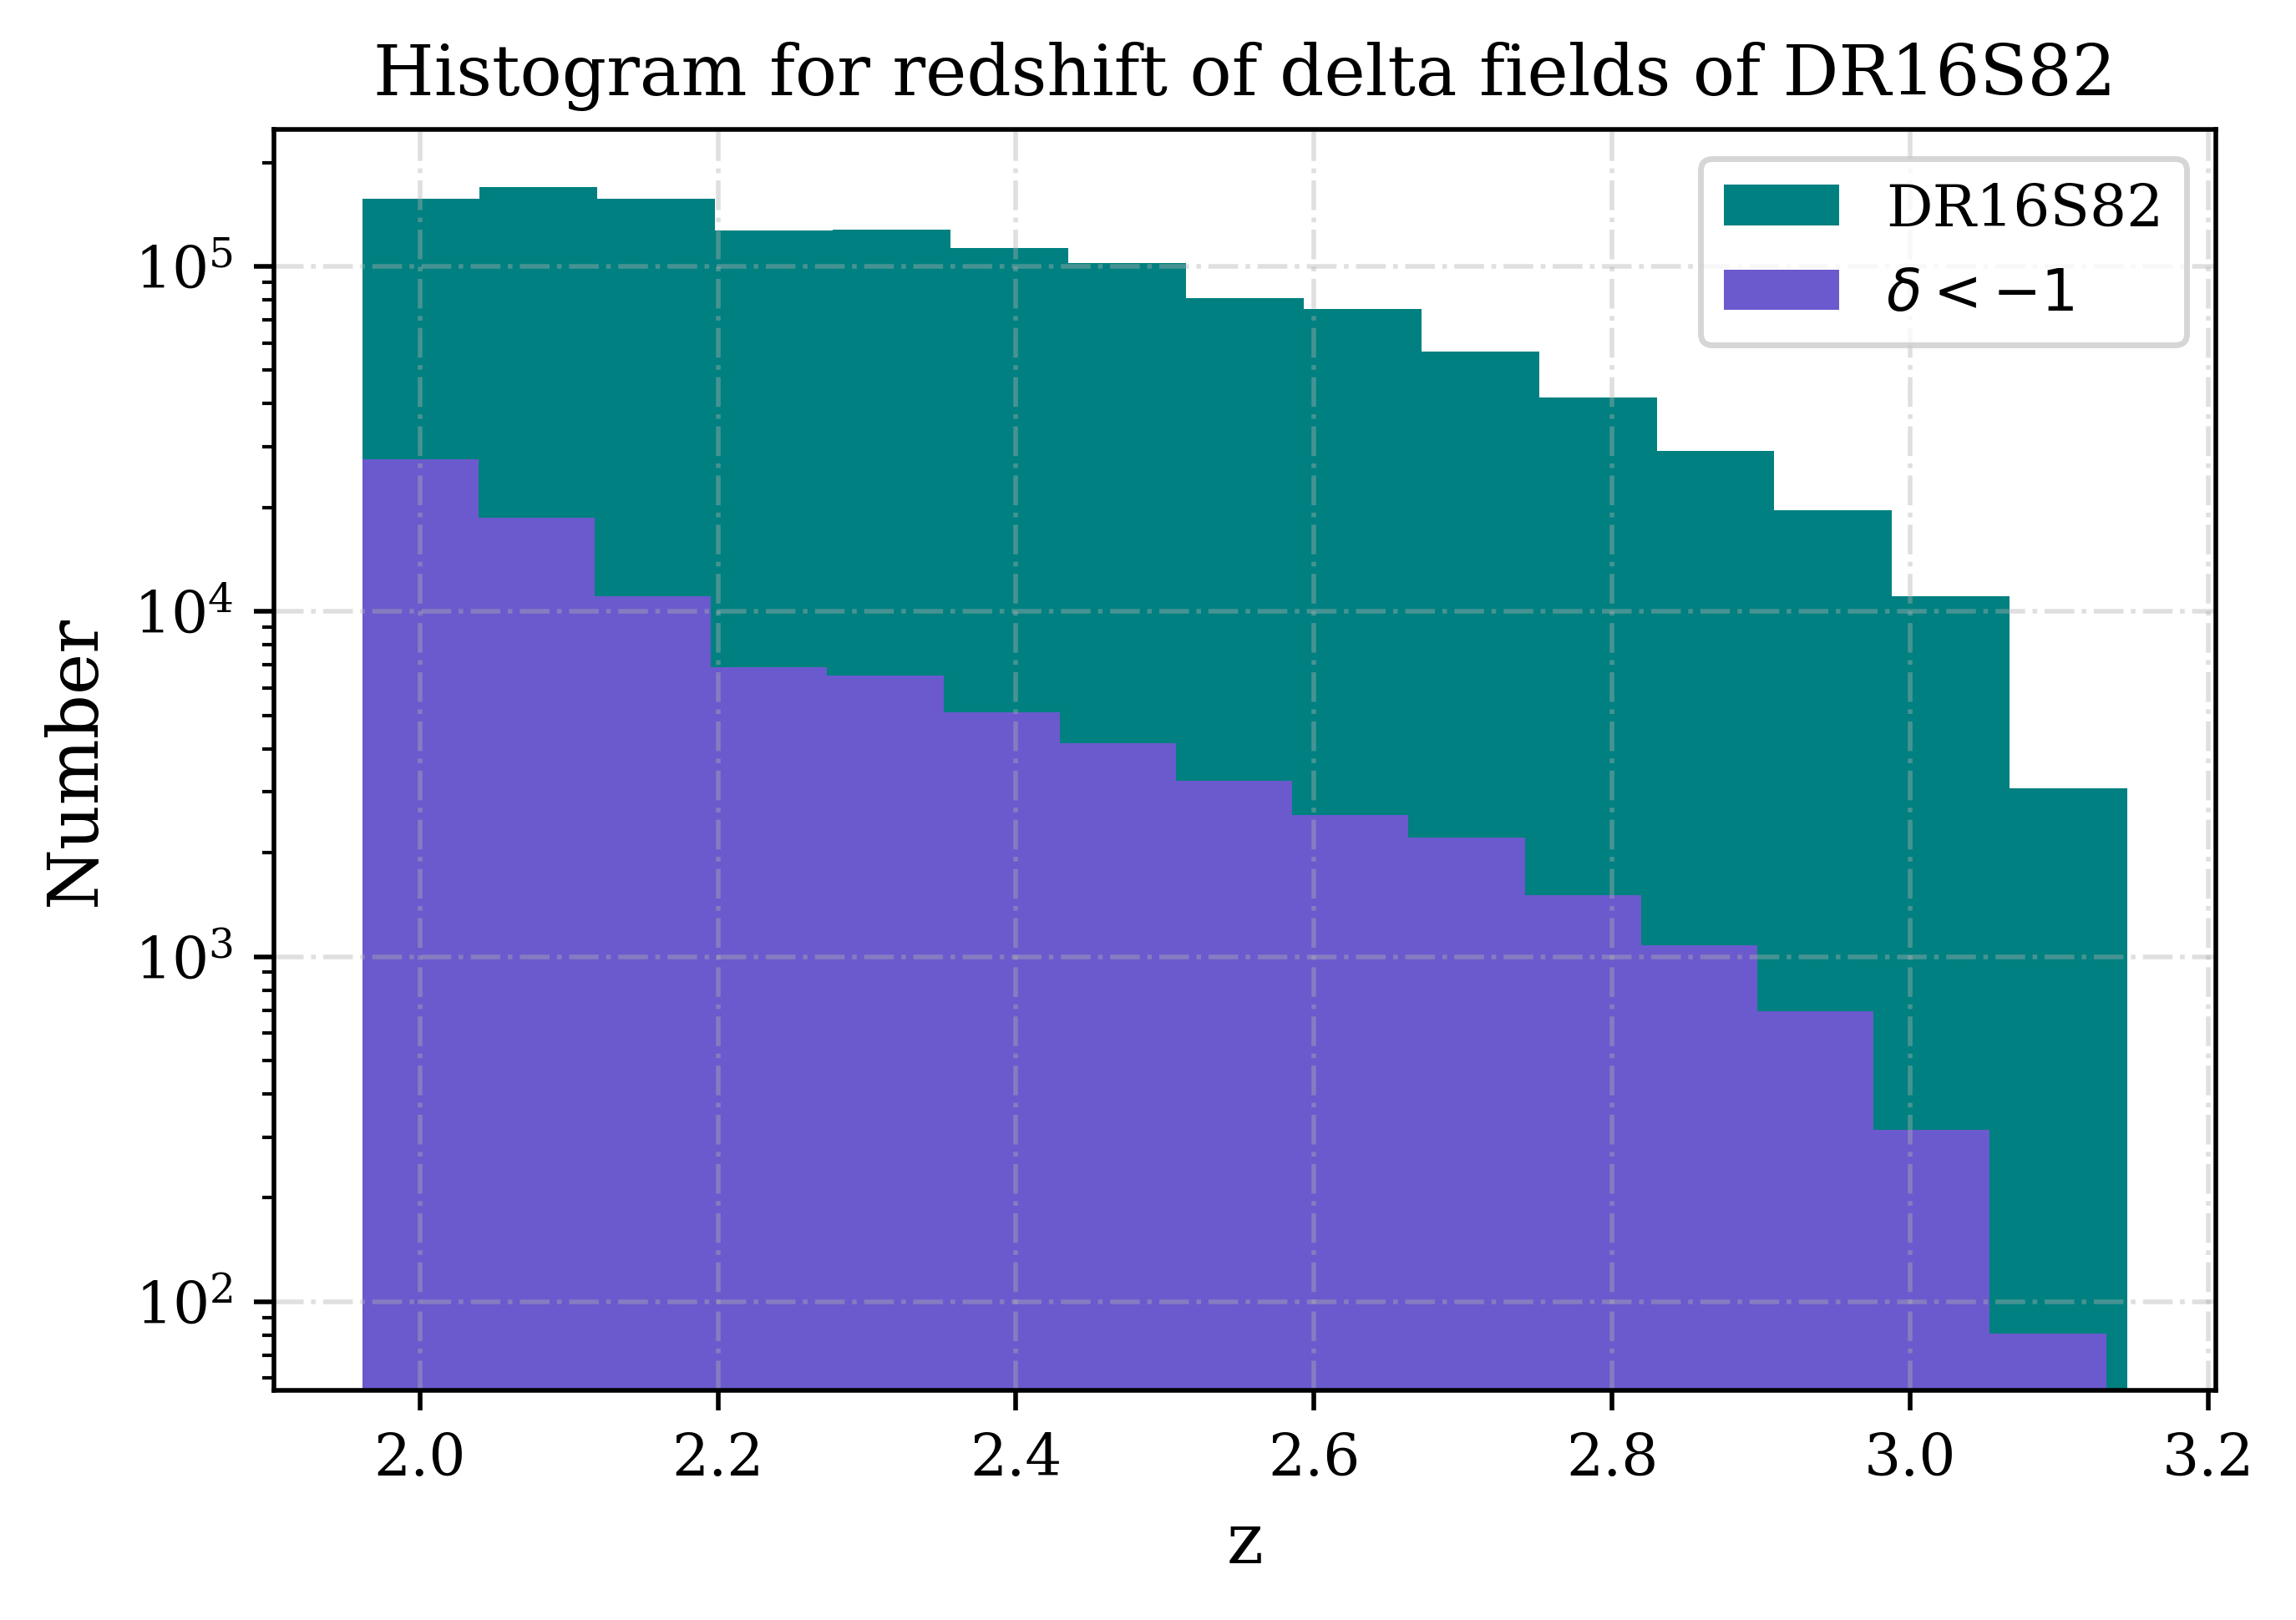

In [30]:

dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for redshift of delta fields of DR16S82',fontsize=12)                                         
plt.xlabel(r'z',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(deltaf['z'] , log=True, color='teal',bins=15,label='DR16S82')  
plt.hist(less_1['z'] , log=True, color='slateblue',bins=15,label='$\delta<-1$' )                                                                                               
#plt.hist(2*np.pi*data[1].data['ra'], color='teal') 
plt.legend();
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')  
#max(quasars['comoving'])

In [31]:
#histograms for quasars, especially check redshift

## Investigate the spectra

In [32]:
onlyfiles = [f for f in listdir('/global/homes/i/ineslie/myhack/Delta_LYA/Delta/DR16/') if isfile(join('/global/homes/i/ineslie/myhack/Delta_LYA/Delta/DR16/', f))]
onlyfiles
print(len(onlyfiles))
onlyfiles.remove('deltafields_RAadded90.fits')
onlyfiles.remove('check_deltas.ipynb')
onlyfiles.remove('prepare_deltas.py')
onlyfiles.remove('prepare_deltas.py~')

16


In [33]:
print(len(onlyfiles))

12


In [34]:
for file in onlyfiles:
    d = fits.open('/global/homes/i/ineslie/myhack/Delta_LYA/Delta/DR16/'+file)
    for hdu_num in range(1,len(d)):
        lesss=less_1[less_1['dec'] == d[hdu_num].header['DEC']*(180/np.pi)]  #because DEC is not shifted
        #if len(lesss) !=0:
        #    print(len(lesss))
        #    print(file)
        #    print(hdu_num)

In [35]:
main= fits.open('delta-105.fits.gz')
lambda_obs=10**(Table(main[2].data)['LOGLAM'])
deltas=Table(main[2].data)['DELTA']

In [36]:
len(lambda_obs)
len(deltas)

91

In [37]:
ra_1=main[2].header['RA']
dec_1=main[2].header['DEC']
z_1=main[2].header['Z']

lambda_ref= 1215.668 #angstrom
z_add=(lambda_obs-lambda_ref)/lambda_ref
lambda_q=z_1*lambda_ref+lambda_ref 

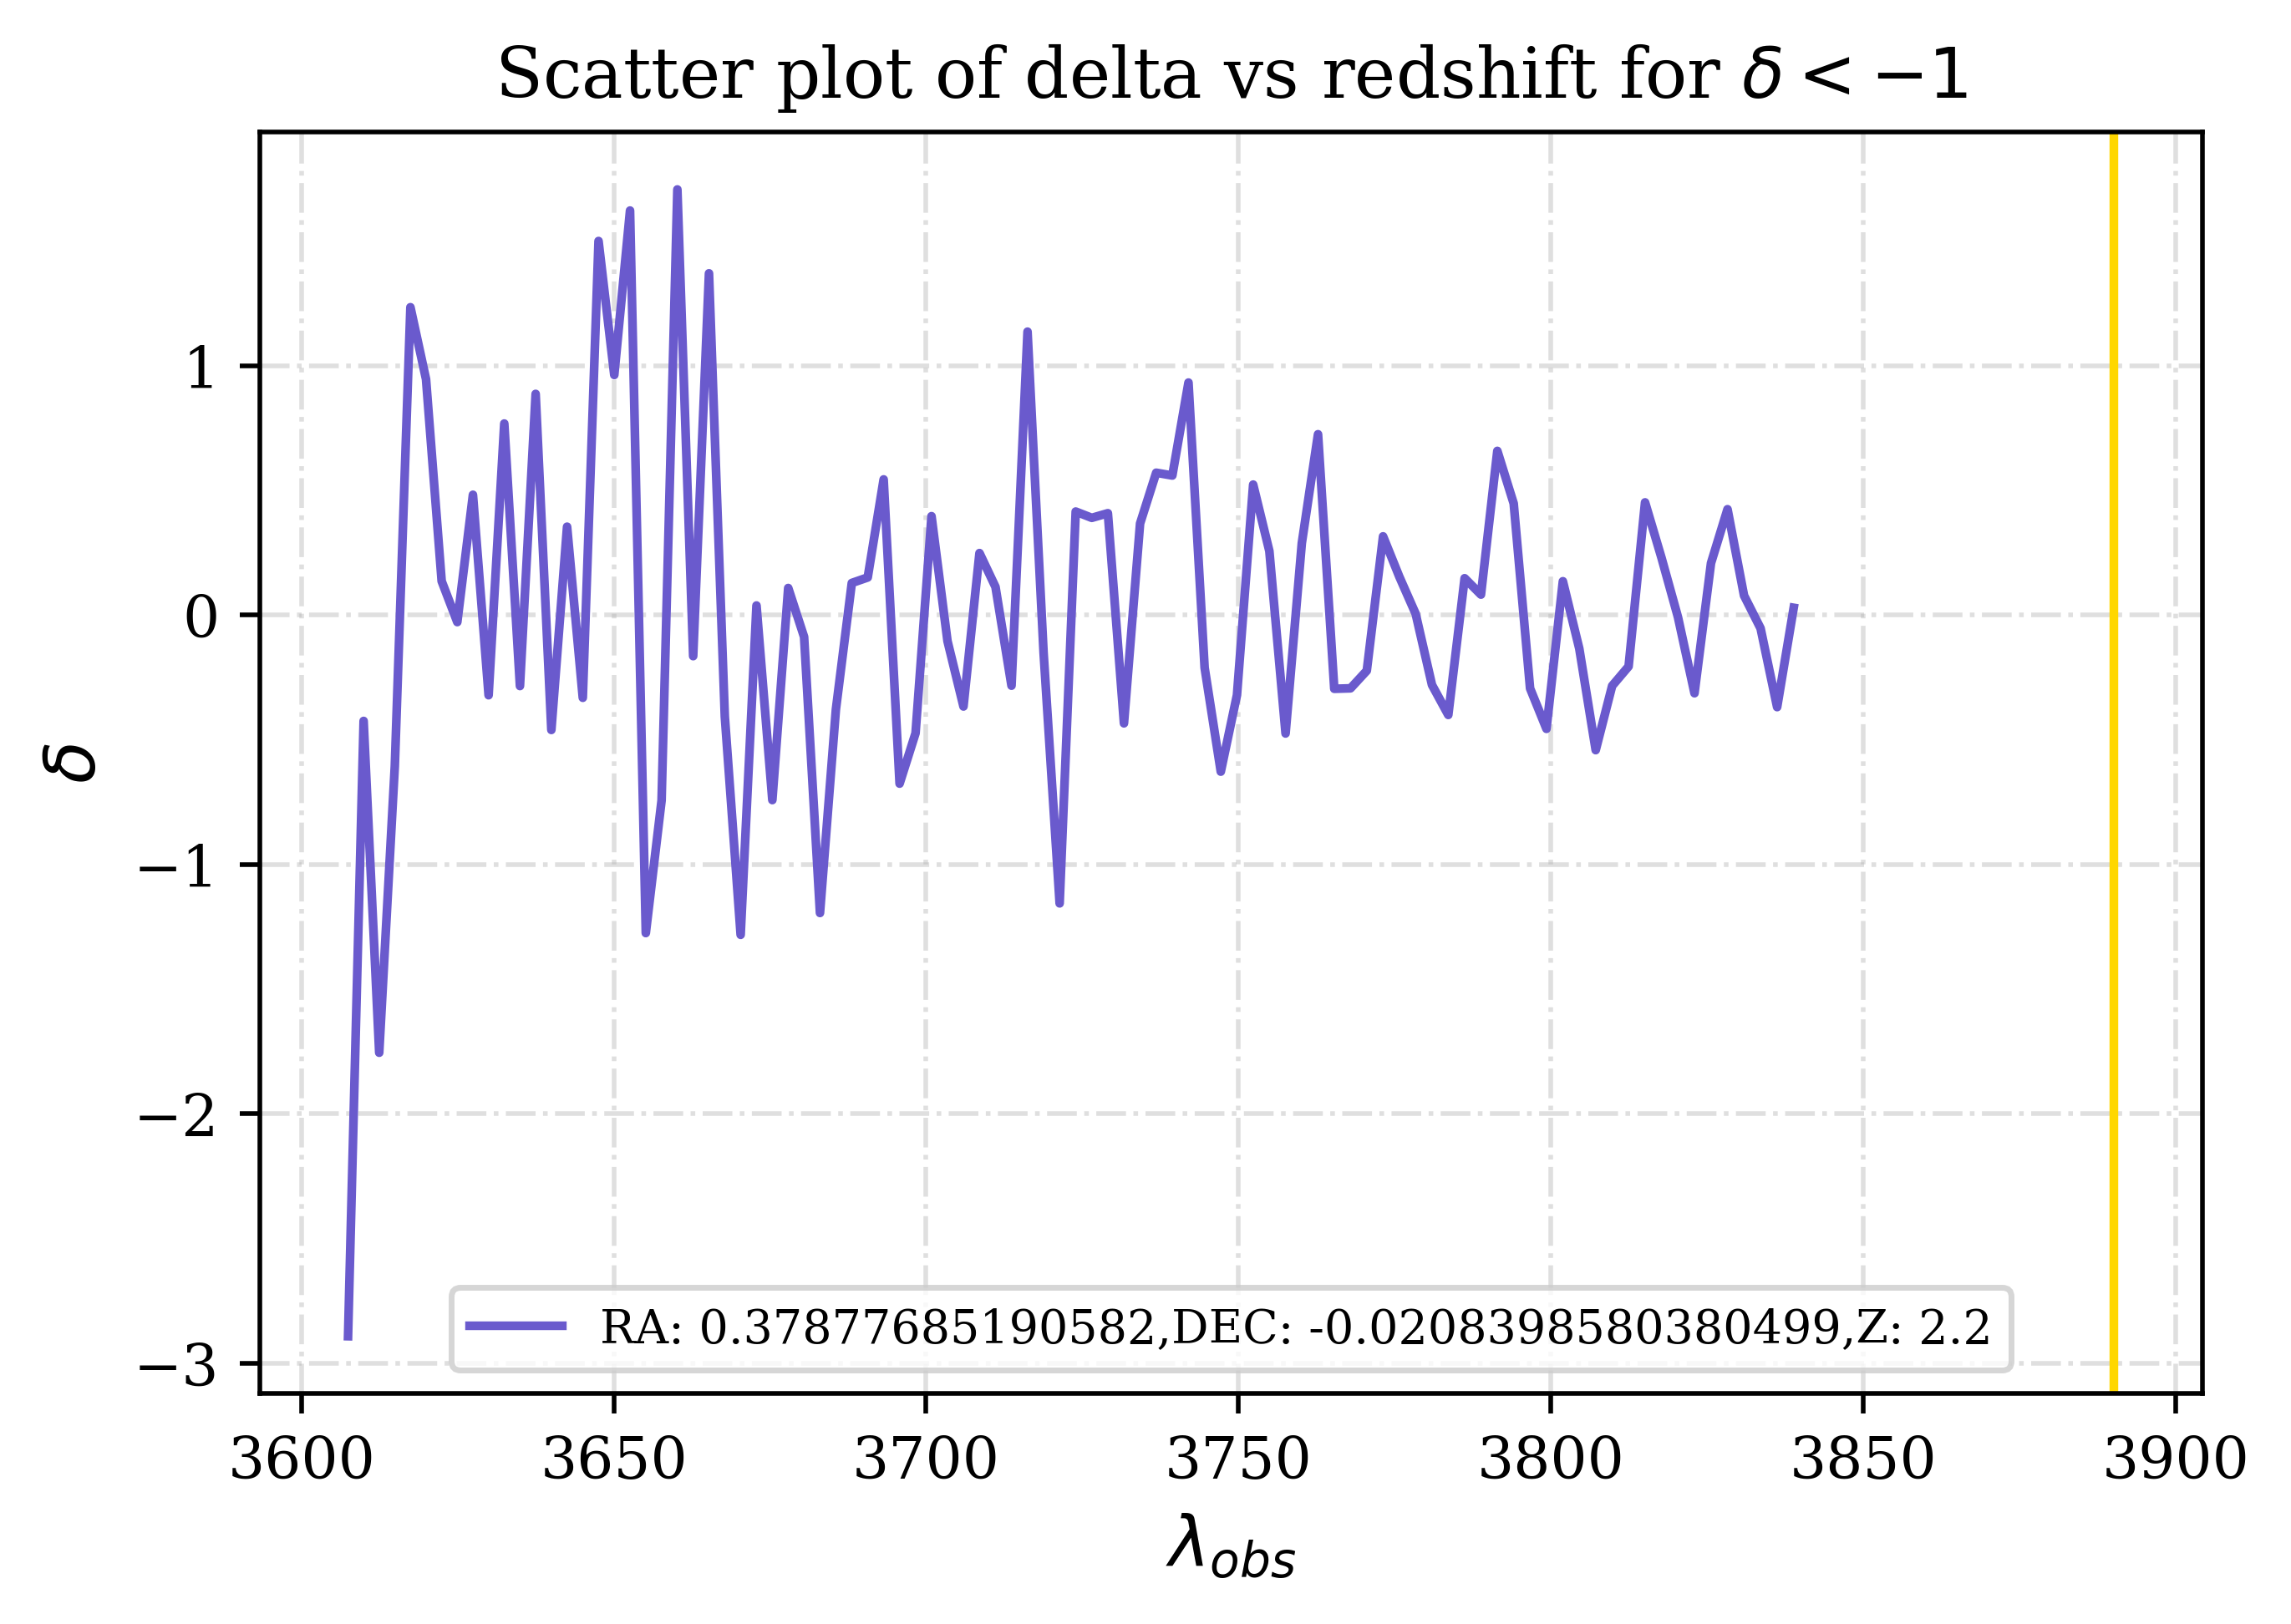

In [38]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\lambda_{obs}$',fontsize=12)                                                                       
plt.ylabel(r'$\delta$',fontsize=12)

plt.axvline(x=lambda_q, color='gold', linestyle='-')
plt.plot(lambda_obs, deltas, color='slateblue' , label='RA: %s'%ra_1 +','+'DEC: %s'%dec_1+','+'Z: %s'%z_1)

plt.legend(fontsize=8);
plt.show()

In [39]:
#NO flux column so calculate flux for yourself
Table(main[2].data[0:5])

LOGLAM,DELTA,WEIGHT,CONT
float64,float64,float64,float64
3.5572025007672874,-2.892511350150362,0.28002293444147847,3.127049037388865
3.557502500767287,-0.42414014363535846,1.1094720000728506,3.1175703254022133
3.5578025007672873,-1.7551746038121467,1.2561345622275808,3.1091262593159916
3.558102500767287,-0.6058401119741326,1.0839840290881473,3.0577385924387284
3.5584025007672873,1.2356306733841511,0.8675098223508209,3.0174670720842096


In [40]:
main[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                   91 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'LOGLAM  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'log Angstrom'       / physical unit of field                         
TTYPE2  = 'DELTA   '           / label for field   2                            
TFORM2  = 'D       '        

In [41]:
main[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [42]:
#Flux calculation
#flux_1=(main[2].data['DELTA']+1)*main[2].data['CONT']
#flux_1

dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Spectra for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\lambda_{obs}$',fontsize=12)                                                                       
plt.ylabel(r'$\delta$',fontsize=12)

plt.axvline(x=lambda_q, color='gold', linestyle='-')
plt.plot(lambda_obs, main[2].data['FLUX'], color='slateblue' , label='RA: %s'%ra_1 +','+'DEC: %s'%dec_1+','+'Z: %s'%z_1)

plt.legend(fontsize=8);
plt.show()

In [43]:
main= fits.open('delta-88.fits.gz')
lambda_obs=10**(Table(main[1691].data)['LOGLAM'])
deltas=Table(main[1691].data)['DELTA']

In [44]:
ra_1=main[1691].header['RA']
dec_1=main[1691].header['DEC']
z_1=main[1691].header['Z']

lambda_ref= 1215.668 #angstrom
z_add=(lambda_obs-lambda_ref)/lambda_ref
lambda_q=z_1*lambda_ref+lambda_ref 

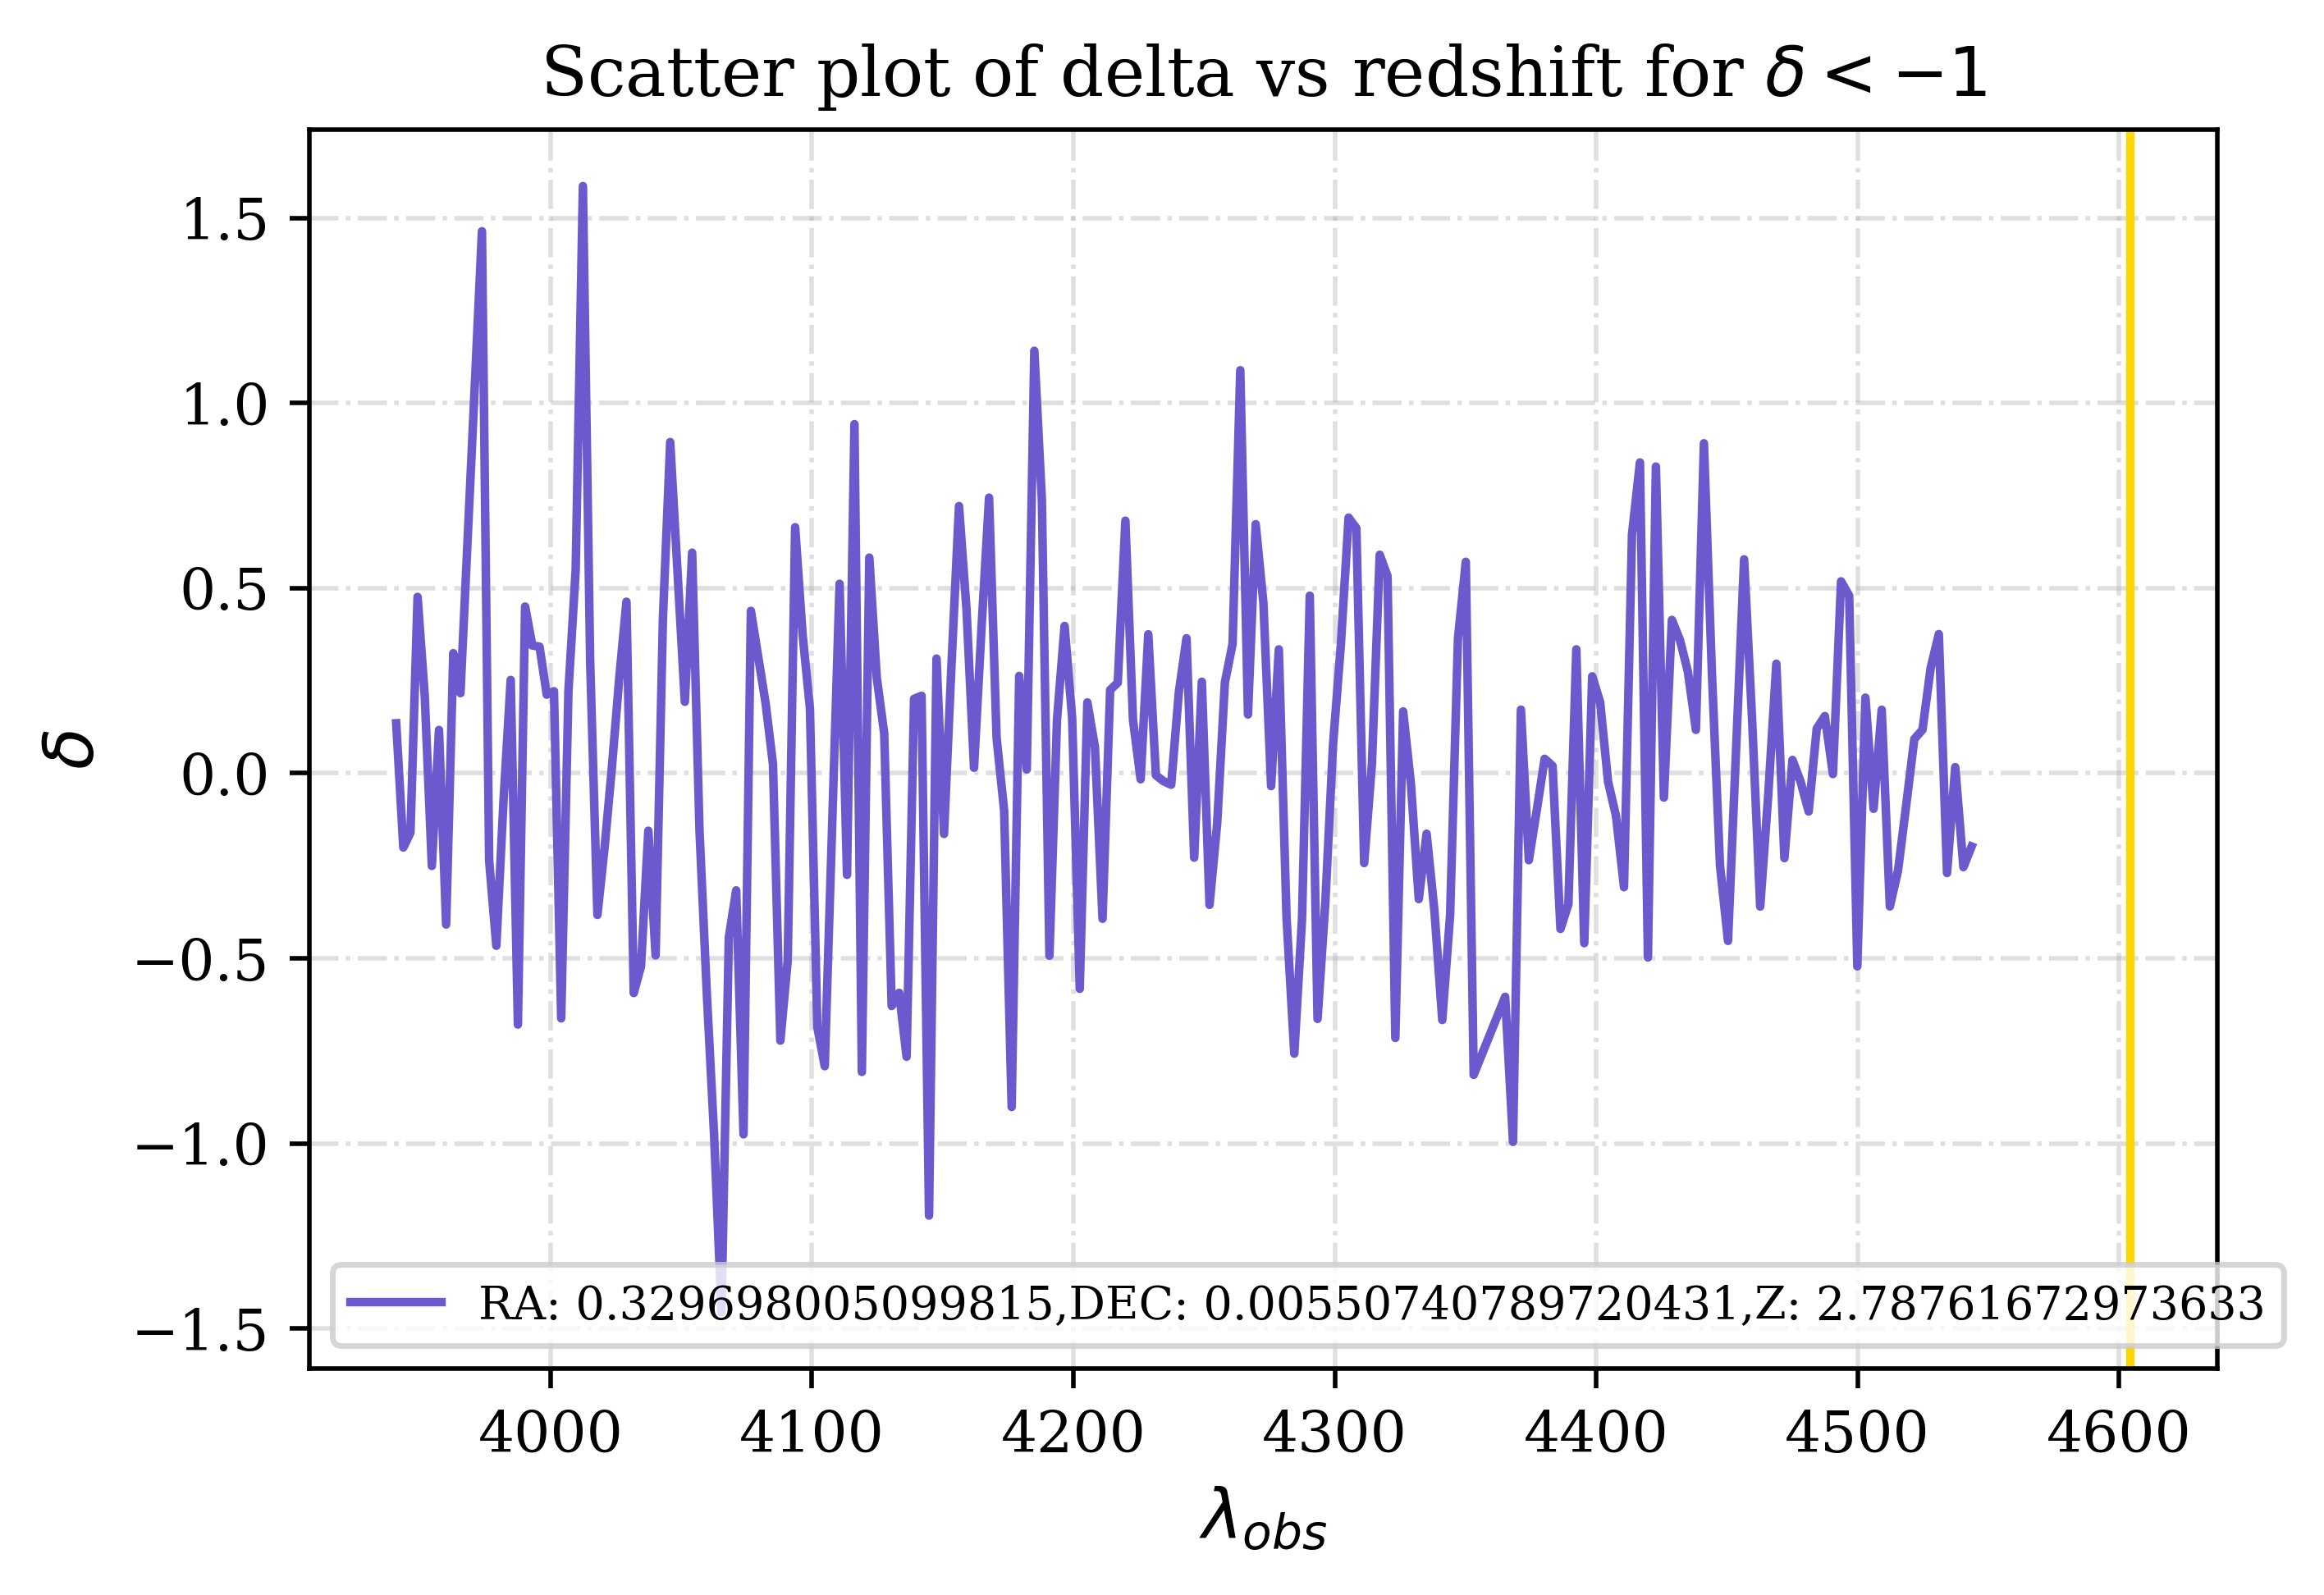

In [45]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\lambda_{obs}$',fontsize=12)                                                                       
plt.ylabel(r'$\delta$',fontsize=12)

plt.axvline(x=lambda_q, color='gold', linestyle='-')
plt.plot(lambda_obs, deltas, color='slateblue' , label='RA: %s'%ra_1 +','+'DEC: %s'%dec_1+','+'Z: %s'%z_1)

plt.legend(fontsize=8);
plt.show()

In [46]:
main= fits.open('/global/homes/i/ineslie/myhack_DR16/Delta_LYA/Delta/'+'delta-102.fits.gz')
lambda_obs=10**(Table(main[1172].data)['LOGLAM'])
deltas=Table(main[1172].data)['DELTA']

In [47]:
ra_1=main[1172].header['RA']
dec_1=main[1172].header['DEC']
z_1=main[1172].header['Z']

lambda_ref= 1215.668 #angstrom
z_add=(lambda_obs-lambda_ref)/lambda_ref
lambda_q=z_1*lambda_ref+lambda_ref 

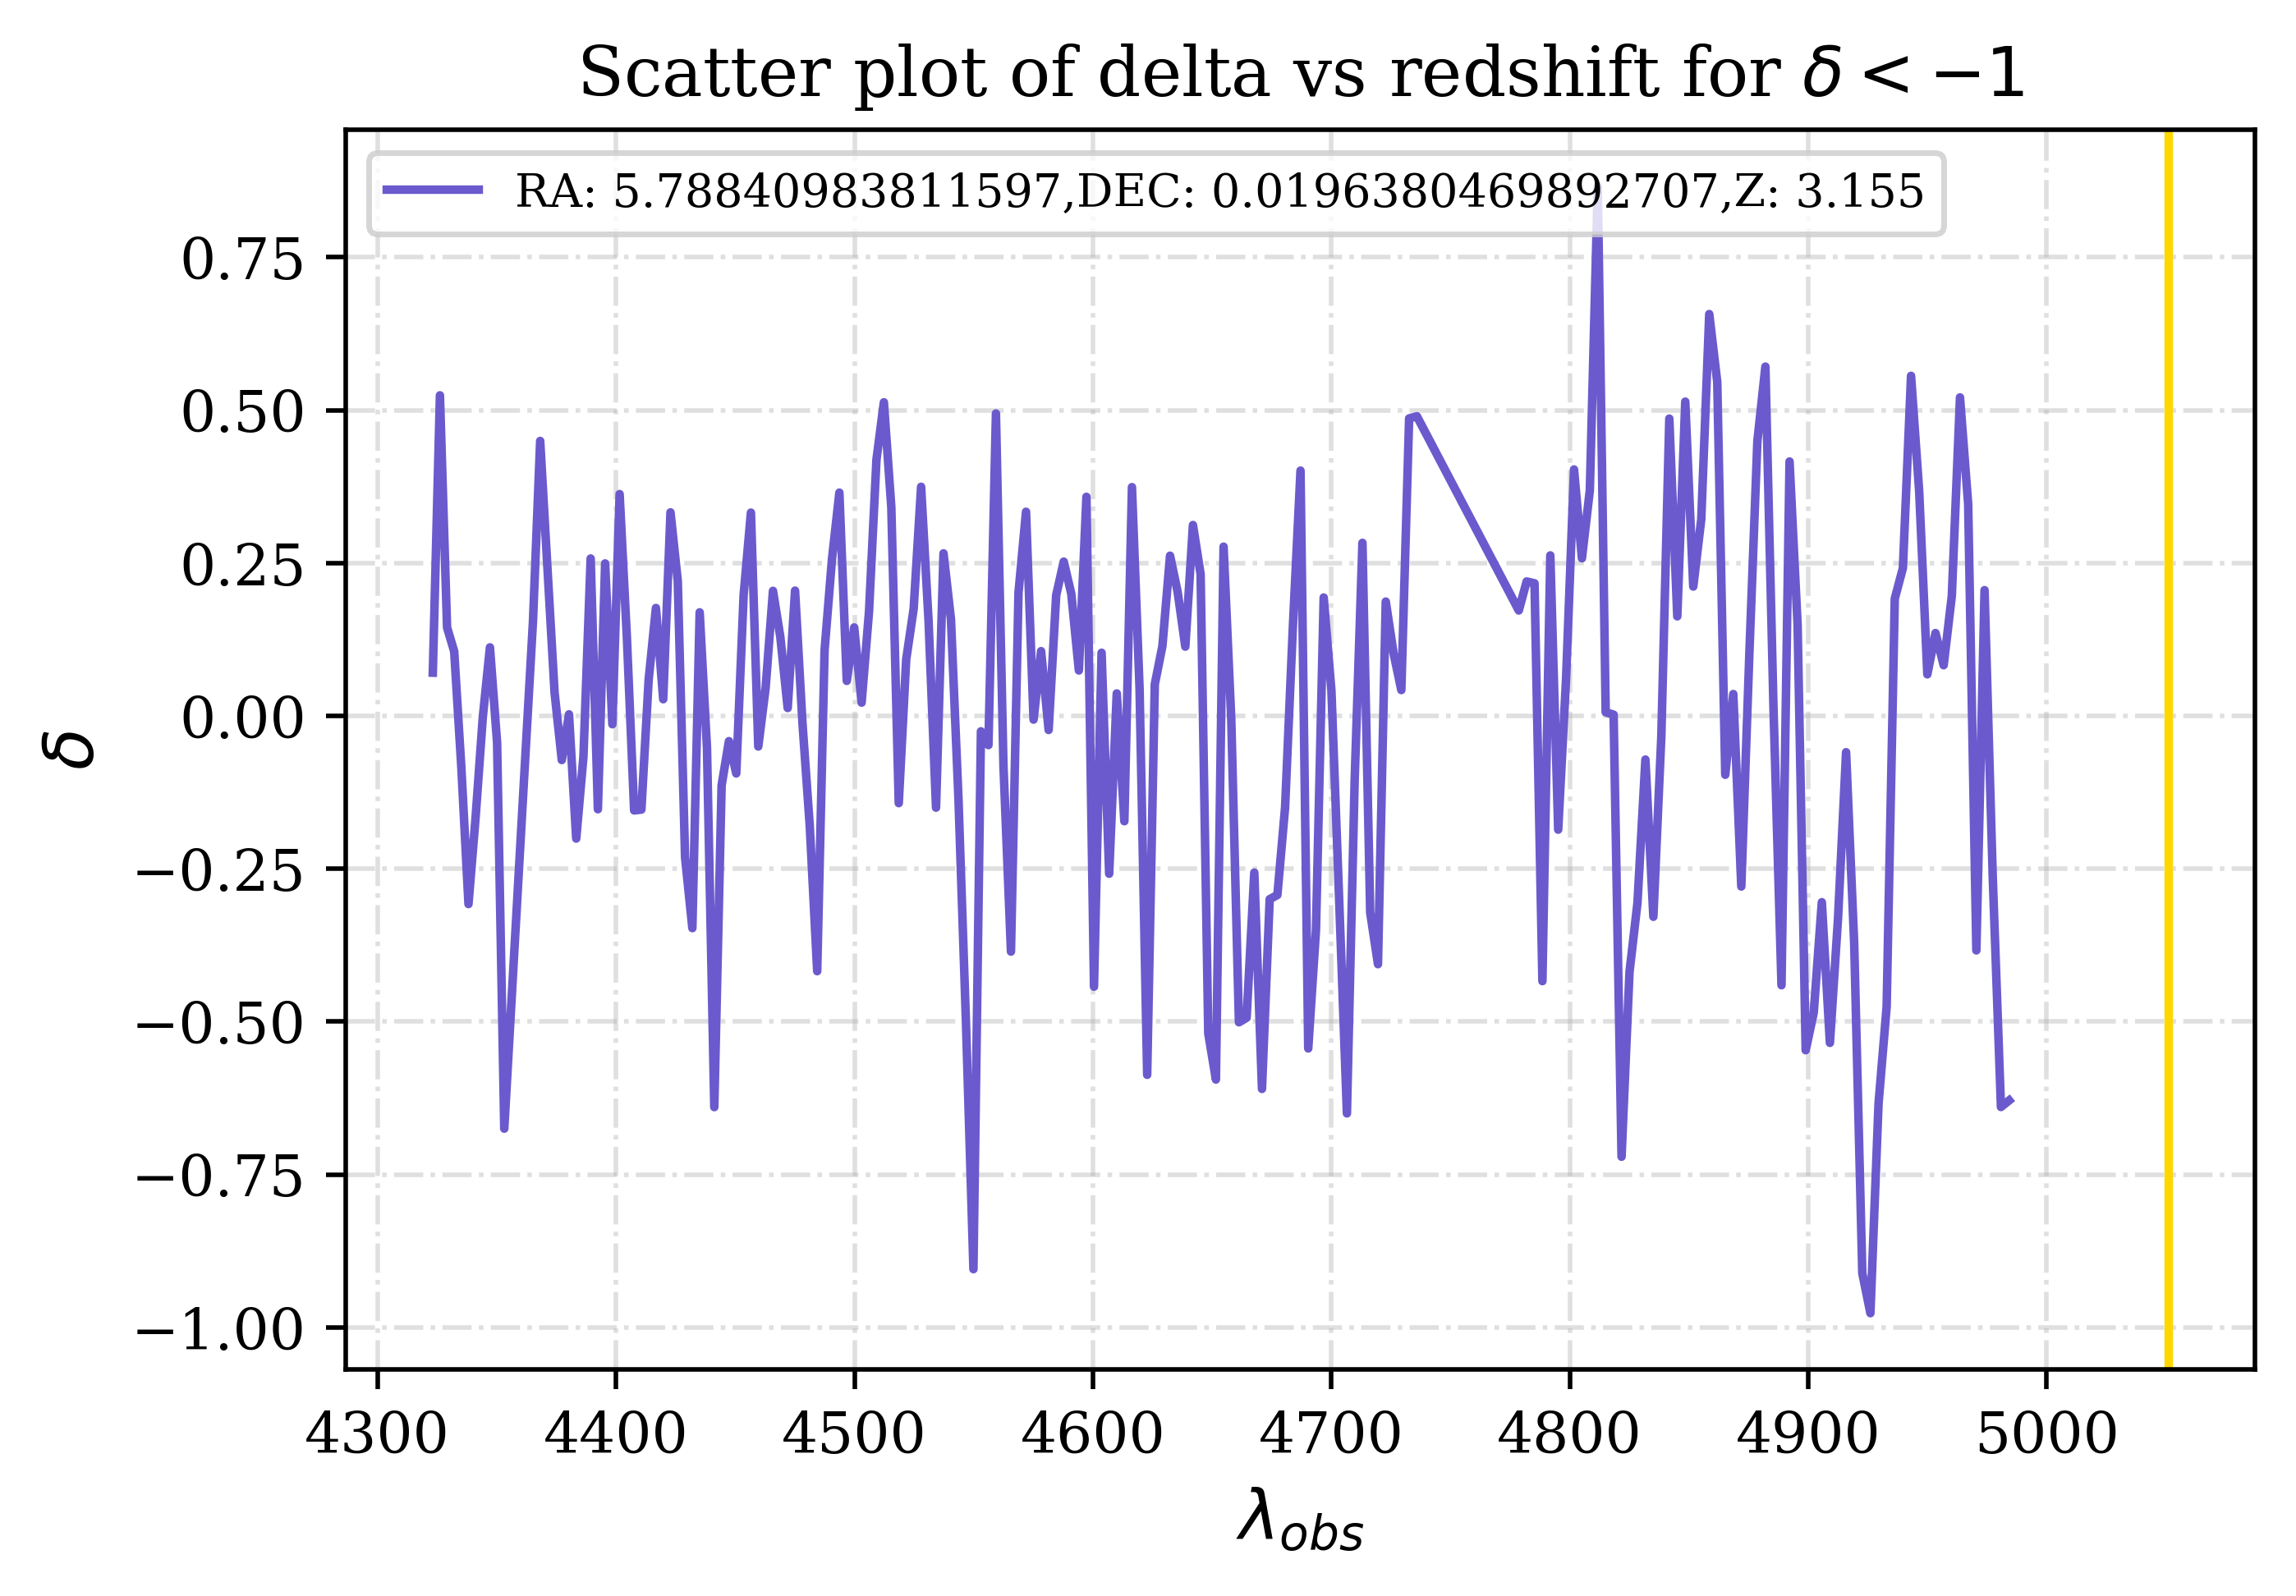

In [48]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\lambda_{obs}$',fontsize=12)                                                                       
plt.ylabel(r'$\delta$',fontsize=12)

plt.axvline(x=lambda_q, color='gold', linestyle='-')
plt.plot(lambda_obs, deltas, color='slateblue' , label='RA: %s'%ra_1 +','+'DEC: %s'%dec_1+','+'Z: %s'%z_1)

plt.legend(fontsize=8);
plt.show()

In [49]:
max(lambda_obs[deltas<-1]) #my_suggestion

ValueError: max() arg is an empty sequence

In [50]:
len(lambda_obs) 

192

In [51]:
len(lambda_obs[lambda_obs< max(lambda_obs[deltas<-1])])  #This means losing almost all of the data.

ValueError: max() arg is an empty sequence

In [52]:
main= fits.open('delta-103.fits.gz')
lambda_obs=10**(Table(main[799].data)['LOGLAM'])
deltas=Table(main[799].data)['DELTA']
Table(main[799].data)

LOGLAM,DELTA,WEIGHT,CONT
float64,float64,float64,float64
3.557502500767287,56261.50667833517,6.34974391239827e-10,3.219530212934523e-05
3.5578025007672873,-96.72804898633898,6.238965189630048e-07,0.0009587414235163891
3.558102500767287,-68.8306540710277,2.3282417387342814e-06,0.0018561380400876314
3.5584025007672873,107.25403549589205,4.881637734229205e-06,0.002738410327445908
3.5587025007672874,598.8367602721225,7.4458752108257985e-06,0.0035312635024324643
3.559002500767287,-127.98052562198757,1.2635478066360889e-05,0.004338605525184268
3.5593025007672874,-154.4401571881119,2.0291280996628316e-05,0.005163142170120355
3.559602500767287,59.23140125186057,2.4399317383980193e-05,0.005916588439205306
3.5599025007672873,-174.38597686289083,3.0476061764827967e-05,0.00659443244332596


In [53]:
ra_1=main[799].header['RA']
dec_1=main[799].header['DEC']
z_1=main[799].header['Z']

lambda_ref= 1215.668 #angstrom
z_add=(lambda_obs-lambda_ref)/lambda_ref
lambda_q=z_1*lambda_ref+lambda_ref 

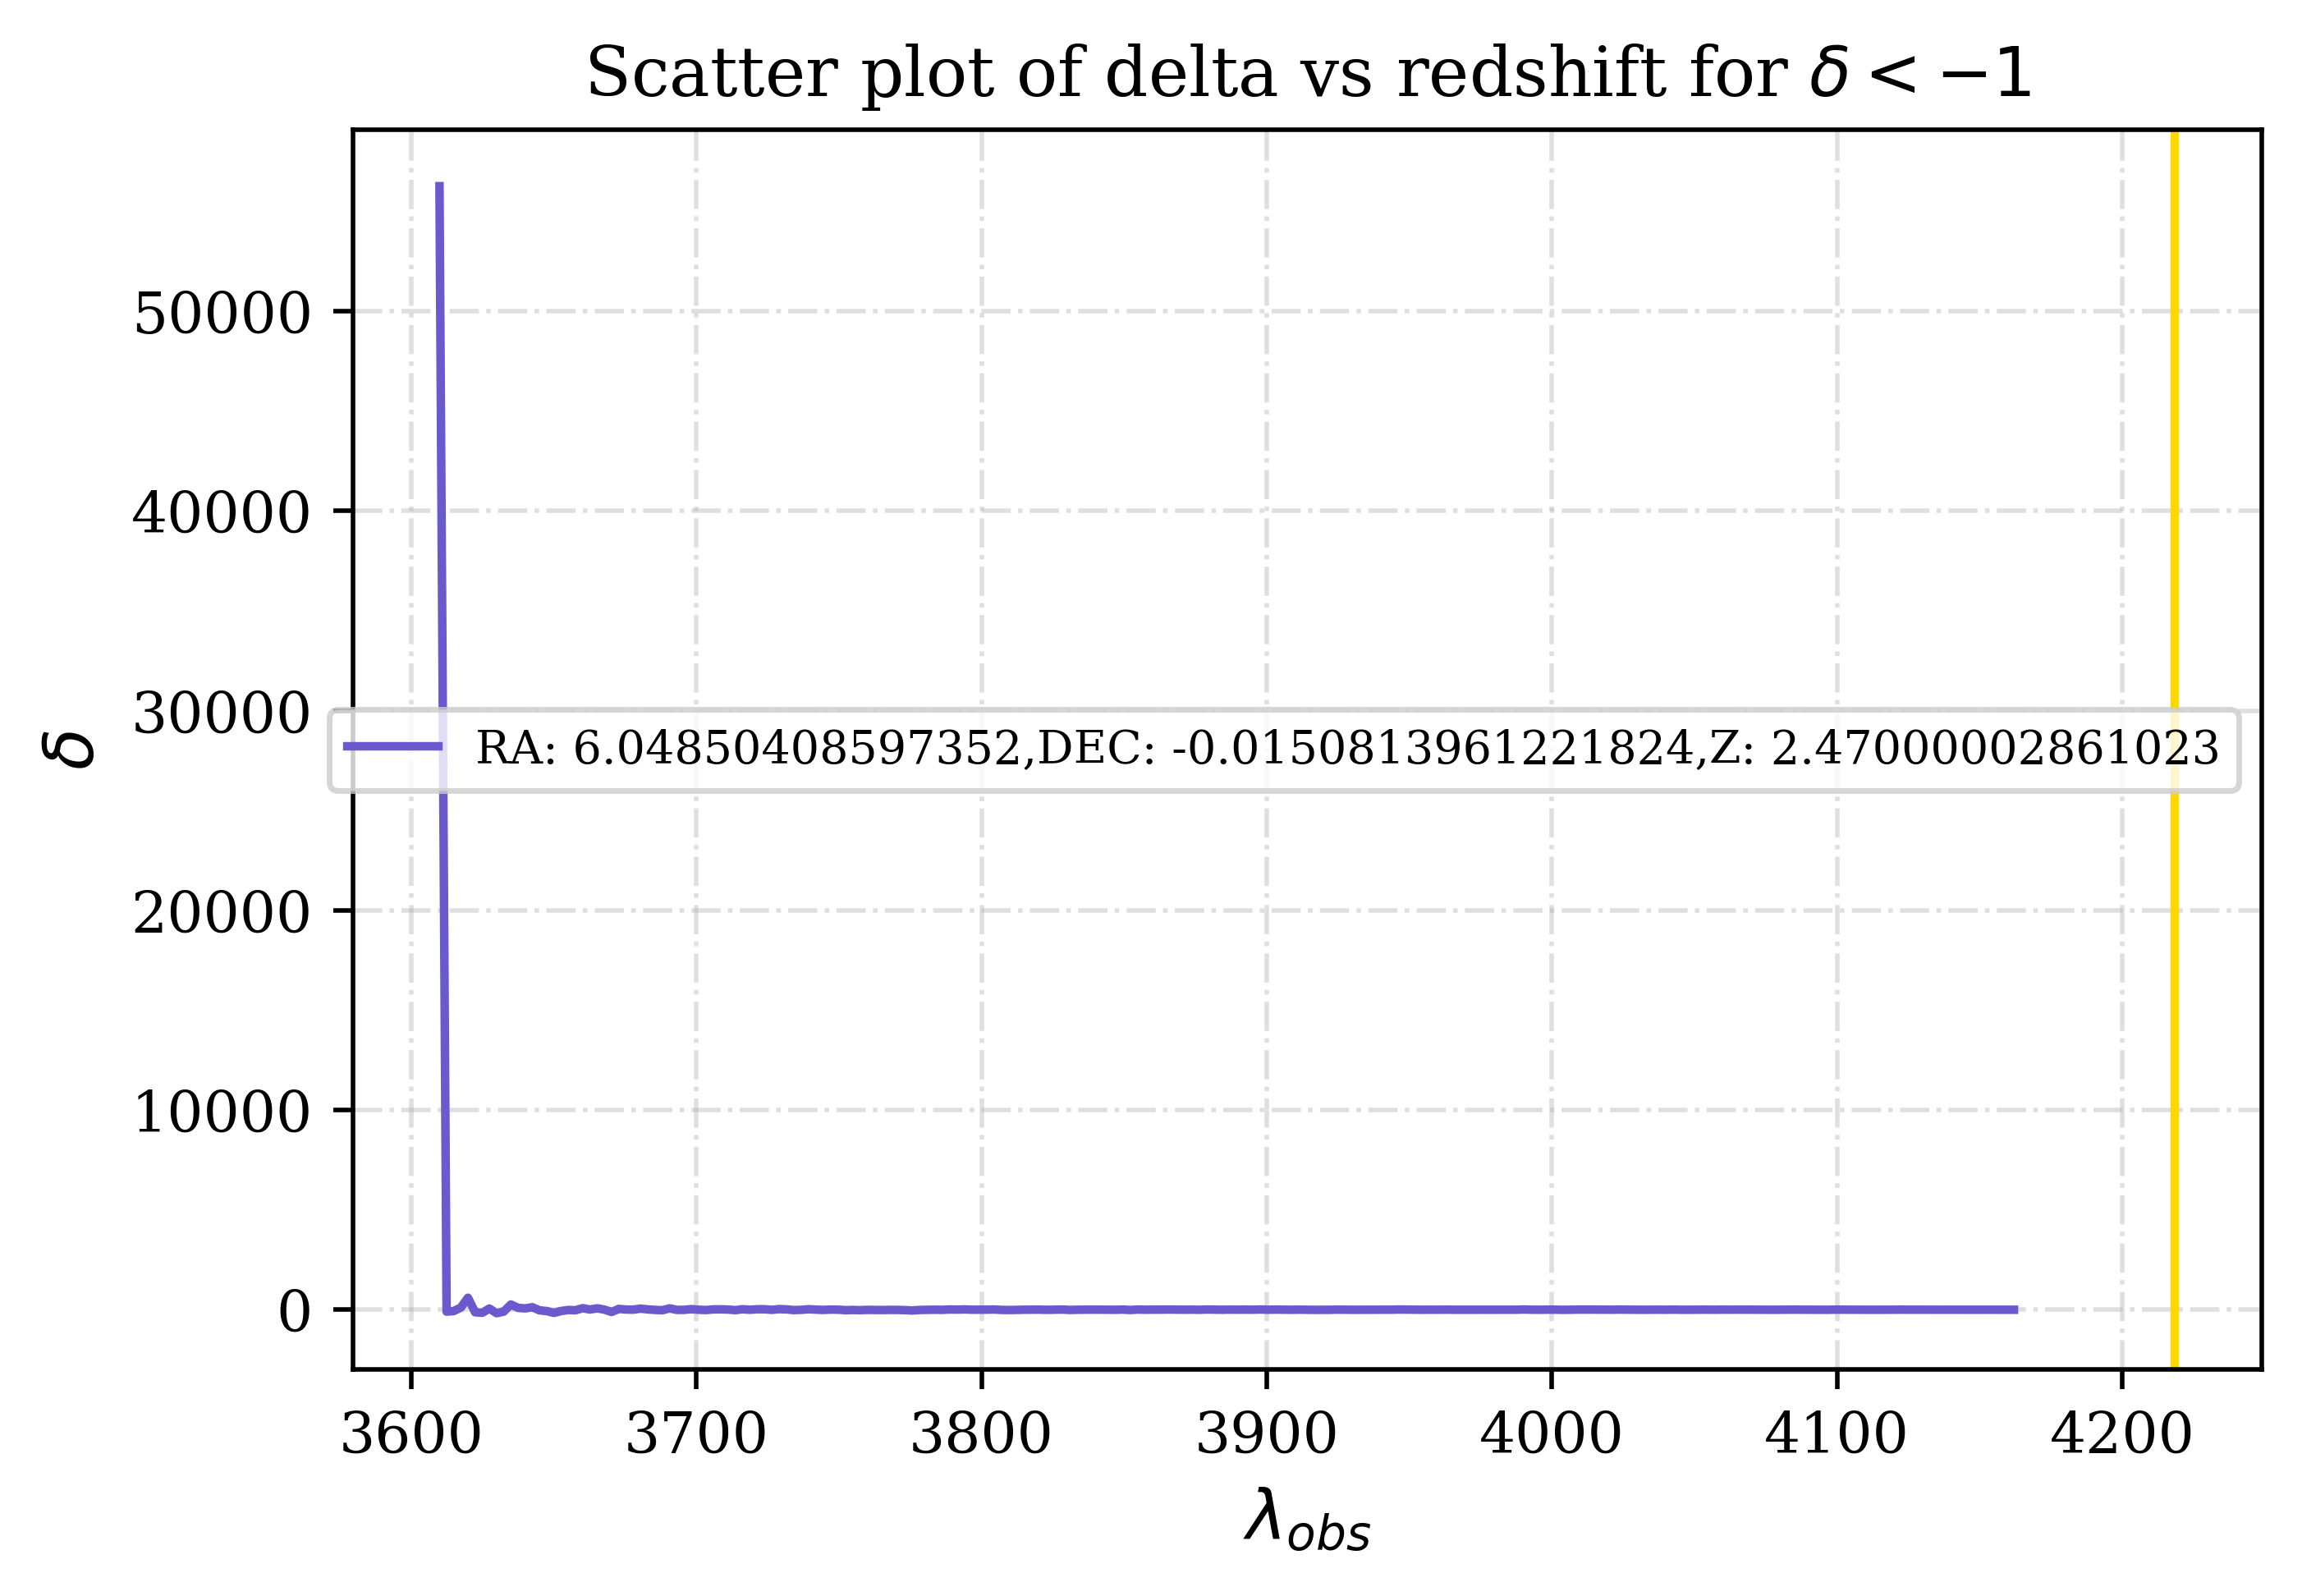

In [54]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Scatter plot of delta vs redshift for $\delta<-1$',fontsize=12)                                         
plt.xlabel(r'$\lambda_{obs}$',fontsize=12)                                                                       
plt.ylabel(r'$\delta$',fontsize=12)

plt.axvline(x=lambda_q, color='gold', linestyle='-')
plt.plot(lambda_obs, deltas, color='slateblue' , label='RA: %s'%ra_1 +','+'DEC: %s'%dec_1+','+'Z: %s'%z_1)

plt.legend(fontsize=8);
plt.show()

In [55]:
outlier = fits.open('/global/homes/i/ineslie/myhack_DR16/Delta_LYA/Delta/delta-103.fits.gz')
#/global/homes/i/ineslie/myhack_DR16/Delta_LYA/Delta/

In [56]:
outlier[799].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                  202 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'LOGLAM  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'log Angstrom'       / physical unit of field                         
TTYPE2  = 'DELTA   '           / label for field   2                            
TFORM2  = 'D       '        

In [57]:
Table(outlier[799].data)

LOGLAM,DELTA,WEIGHT,CONT
float64,float64,float64,float64
3.557502500767287,56261.50667833517,6.34974391239827e-10,3.219530212934523e-05
3.5578025007672873,-96.72804898633898,6.238965189630048e-07,0.0009587414235163891
3.558102500767287,-68.8306540710277,2.3282417387342814e-06,0.0018561380400876314
3.5584025007672873,107.25403549589205,4.881637734229205e-06,0.002738410327445908
3.5587025007672874,598.8367602721225,7.4458752108257985e-06,0.0035312635024324643
3.559002500767287,-127.98052562198757,1.2635478066360889e-05,0.004338605525184268
3.5593025007672874,-154.4401571881119,2.0291280996628316e-05,0.005163142170120355
3.559602500767287,59.23140125186057,2.4399317383980193e-05,0.005916588439205306
3.5599025007672873,-174.38597686289083,3.0476061764827967e-05,0.00659443244332596


In [58]:
outlier[799].header['RA']*(180/np.pi)-360 

-13.446243506083647

In [59]:
Table(main[799].data)

LOGLAM,DELTA,WEIGHT,CONT
float64,float64,float64,float64
3.557502500767287,56261.50667833517,6.34974391239827e-10,3.219530212934523e-05
3.5578025007672873,-96.72804898633898,6.238965189630048e-07,0.0009587414235163891
3.558102500767287,-68.8306540710277,2.3282417387342814e-06,0.0018561380400876314
3.5584025007672873,107.25403549589205,4.881637734229205e-06,0.002738410327445908
3.5587025007672874,598.8367602721225,7.4458752108257985e-06,0.0035312635024324643
3.559002500767287,-127.98052562198757,1.2635478066360889e-05,0.004338605525184268
3.5593025007672874,-154.4401571881119,2.0291280996628316e-05,0.005163142170120355
3.559602500767287,59.23140125186057,2.4399317383980193e-05,0.005916588439205306
3.5599025007672873,-174.38597686289083,3.0476061764827967e-05,0.00659443244332596


In [60]:
quasar_filename='quasars.fits'

In [61]:
quasars = fits.open(quasar_filename)  
quasars =Table(quasars[1].data)
quasars[0:5]

ra,dec,z
float64,float64,float64
21.652010971159942,-1.0040558414971168,2.26395440101624
21.7023149914553,-1.1940359112320433,2.2
21.531981101320415,-0.9548237196365138,2.19532799720764
21.614665018659853,-0.891022759832792,2.25147986412048
21.68371321770447,-0.7983495021364124,2.11498427391052


In [62]:
len(quasars)

7784